In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cebra
import cebra.datasets
from cebra import CEBRA


### 1. Load in Mthal data 
- CEBRA models 
- corrisponding embeddings (create from models and neural data)
- discerte_lables (what was used to train the model)
###### Neural Data
- neural_data (all nerual data (100%) full recording), 
- neural_train (neural data seperated into training group (80% of neural_data) that made corresponding cebra model)
- neural_test (neural data seperated into test group (20% of neural_data) that made corresponding cebra model)

In [3]:
mouse = 'necab1'

In [4]:
# variables to load different models and neural data
num_reaches = 179
probe = 'B' # probe used for the neural data
bin_size_in_ms = 50 # in milliseconds
output_dimension = 32 # number of dimensions for the embeddingspre
pre_reach = 0.5
post_reach = 10

load full neural_data

In [5]:
pre_reach_str = str(pre_reach)
if pre_reach < 1:
    window_size = f'{pre_reach_str[0]}{pre_reach_str[-1]}_{post_reach}_timeWindow'
if pre_reach >= 1:
    window_size = f'{pre_reach_str}_{post_reach}_timeWindow'

# the path to the .npy file for the neural data (structred as firing rates x time x neurons)
neural_data_path =f'neural_data/{mouse}_{bin_size_in_ms}ms_FR_{window_size}_{probe}.npy'

# load the neural data
neural_data = cebra.load_data(neural_data_path)
print(neural_data.shape)
neural_data_transposed = neural_data.T  # This changes shape to (58380, 538)
print(neural_data_transposed.shape)
mthal_neural_data = neural_data_transposed
print(mthal_neural_data.shape)

mthal_neural_data_original = neural_data

(403, 38220)
(38220, 403)
(38220, 403)


load neural data (train and test)

In [6]:
path_ = f'train_test_data/{mouse}_neural_train.npy'
neural_train = np.load(path_)

path_ = f'train_test_data/{mouse}_neural_test.npy'
neural_test = np.load(path_)

path_ = f'train_test_data/{mouse}_label_train.npy'
label_train = np.load(path_)

path_ = f'train_test_data/{mouse}_label_test.npy'
label_test = np.load(path_)

neural_train.shape, neural_test.shape, label_train.shape, label_test.shape

((30072, 403), (7518, 403), (30072,), (7518,))

In [7]:
48928 + 12232

61160

load cebra models and make embeddings

In [8]:
MI = 5000 # maximum number of iterations
OD =32 # output dimension
P = 'B' # probe letter

In [9]:
# We get train set embedding and test set embedding.
cebra_posdir_model_mthal = cebra.CEBRA.load(f"cebra_models/necab1/01/B/cebra_trialID_SucessFailure_model_{MI}_{OD}_{P}.pt")
cebra_posdir_train_mthal = cebra_posdir_model_mthal.transform(neural_train)
cebra_posdir_test_mthal = cebra_posdir_model_mthal.transform(neural_test)

cebra_pos_model_mthal =  cebra.CEBRA.load(f"cebra_models/necab1/01/B/cebra_trialID_model_{MI}_{OD}_{P}.pt")
cebra_pos_train_mthal = cebra_pos_model_mthal.transform(neural_train)
cebra_pos_test_mthal = cebra_pos_model_mthal.transform(neural_test)

cebra_dir_model_mthal =  cebra.CEBRA.load(f"cebra_models/necab1/01/B/cebra_SucessFailure_model_{MI}_{OD}_{P}.pt")
cebra_dir_train_mthal = cebra_dir_model_mthal.transform(neural_train)
cebra_dir_test_mthal = cebra_dir_model_mthal.transform(neural_test)

cebra_pos_all_mthal = cebra_pos_model_mthal.transform(mthal_neural_data)
cebra_dir_all_mthal = cebra_dir_model_mthal.transform(mthal_neural_data)
cebra_posdir_all_mthal = cebra_posdir_model_mthal.transform(mthal_neural_data)

load discerte_lables 

In [10]:
load_path = f'discrete_lables/{mouse}_trial_ID_SF.npy'
discrete_labled_loaded = np.load(load_path)
discete_lables = discrete_labled_loaded
print(discete_lables.shape)
np.unique(discete_lables[:,0]), np.unique(discete_lables[:,1])

(37590, 2)


(array([0., 1., 2.]), array([0., 1.]))

In [11]:
cebra_posdir_all_mthal = cebra_posdir_all_mthal[:37590]
cebra_posdir_all_mthal.shape
cebra_pos_all_mthal =cebra_pos_all_mthal[:37590]
cebra_dir_all_mthal = cebra_dir_all_mthal[:37590]


preview embeddings

In [12]:
cebra_posdir_train_mthal.shape

(30072, 32)

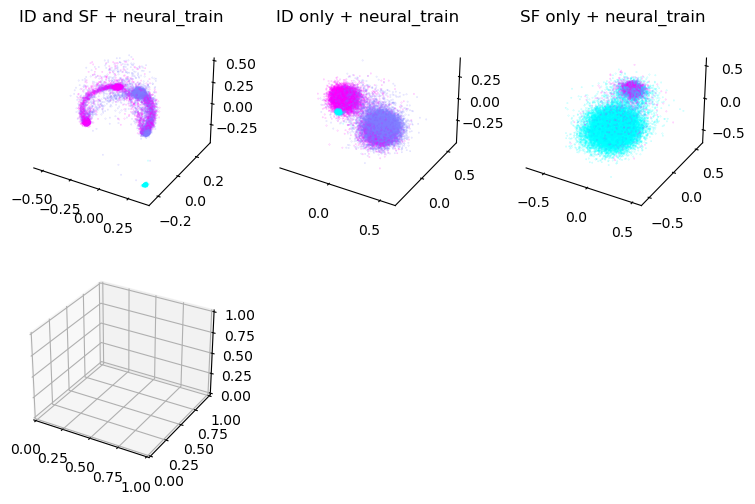

In [13]:

fig=plt.figure(figsize=(9,6))

ax1=plt.subplot(231, projection = '3d')
ax2=plt.subplot(232, projection = '3d')
ax3=plt.subplot(233, projection = '3d')
ax4=plt.subplot(234, projection = '3d')



ax1=cebra.plot_embedding(ax=ax1, embedding=cebra_posdir_all_mthal, embedding_labels=discete_lables[:,0], title='ID and SF + neural_train')
ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all_mthal, embedding_labels=discete_lables[:,0], title='ID only + neural_train')
ax3=cebra.plot_embedding(ax=ax3, embedding=cebra_dir_all_mthal, embedding_labels=discete_lables[:,1], title='SF only + neural_train')
# ax4=cebra.plot_embedding(ax=ax4, embedding=cebra_posdir_train_mthal, embedding_labels=label_train[:,0], title='ID and SF + neural_train')



# ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all, embedding_labels=label_train[:,0], title='ID only + all neural_data')
plt.show()


load cebra-time models (not trained with lables)

In [14]:
path_0 = "necab1_50msFr_0.0003LR_2000MI_outDim8_B_2024-04-04_14-35-46_timeOnly.cebra"

cebra_time_model_mthal = cebra.CEBRA.load(f'time_only_models/{path_0}')
cebra_time_all_mthal = cebra_time_model_mthal.transform(mthal_neural_data)
cebra_time_train_mthal = cebra_time_model_mthal.transform(neural_train)
cebra_time_test_mthal = cebra_time_model_mthal.transform(neural_test)

In [15]:
cebra_time_all_mthal = cebra_time_all_mthal[:37590]
cebra_time_all_mthal.shape

cebra_time_test_mthal = cebra_time_test_mthal[:7014]
cebra_time_test_mthal.shape

(7014, 8)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

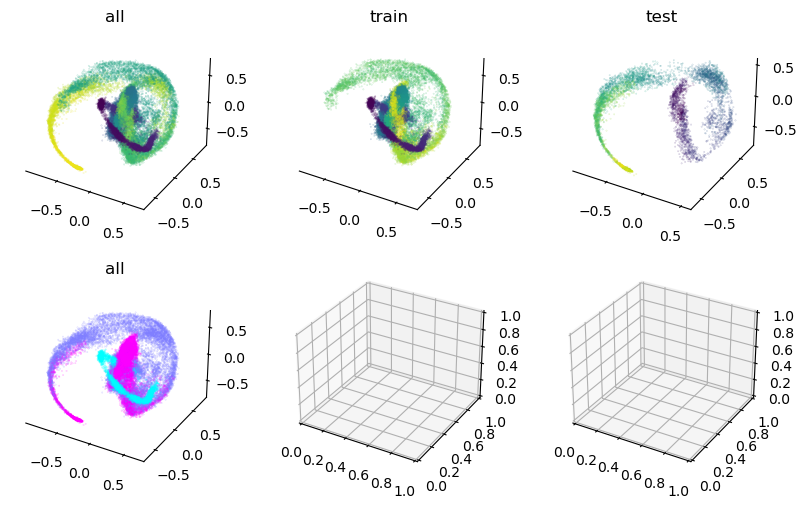

In [16]:

plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column


ax1 = cebra.plot_embedding(ax=ax1,embedding=cebra_time_all_mthal, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=cebra_time_train_mthal, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=cebra_time_test_mthal, embedding_labels='time', title='test')
ax4 = cebra.plot_embedding(ax=ax4,embedding=cebra_time_all_mthal, embedding_labels=discete_lables[:,0], title='all')
ax5 = cebra.plot_embedding(ax=ax5,embedding=cebra_time_train_mthal, embedding_labels=label_train[:,0], title='train')
ax6 = cebra.plot_embedding(ax=ax6,embedding=cebra_time_test_mthal, embedding_labels=label_test[:,0], title='test')
# add title
plt.suptitle('CEBRA-Time Model, Mthal')

cebra-hybrid model

Text(0.5, 0.98, 'CEBRA Hybrid Model')

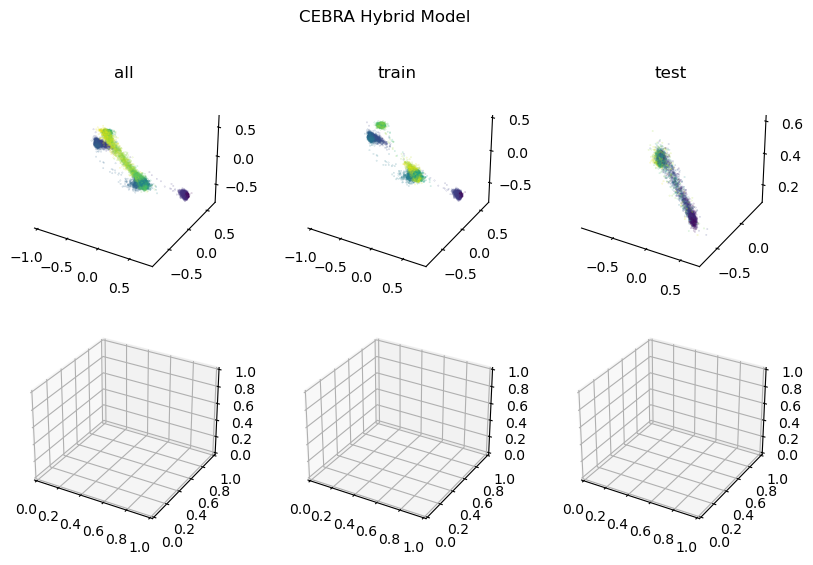

In [17]:

path = r"cebra_models\necab1\01\B\cebra_trialID_hybrid_model_1000_32_B.pt"

# cebra_pos_hybrid_model = cebra.CEBRA.load(f"decoding_models/cebra_trialID_hybrid_model_{MI}_{OD}_{M}_{P}_{current_datetime}.pt")
cebra_pos_hybrid_model_mthal = cebra.CEBRA.load(path)

cebra_hybrid_all_mthal = cebra_pos_hybrid_model_mthal.transform(mthal_neural_data)
cebra_pos_hybrid_train_mthal = cebra_pos_hybrid_model_mthal.transform(neural_train)
cebra_pos_hybrid_test_mthal = cebra_pos_hybrid_model_mthal.transform(neural_test)

plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,embedding=cebra_hybrid_all_mthal, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=cebra_pos_hybrid_train_mthal, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=cebra_pos_hybrid_test_mthal, embedding_labels='time', title='test')
# ax4 = cebra.plot_embedding(ax=ax4,embedding=cebra_hybrid_all_mthal, embedding_labels=discete_lables[:,0], title='all')
# ax5 = cebra.plot_embedding(ax=ax5,embedding=cebra_pos_hybrid_train_mthal, embedding_labels=label_train[:,0], title='train')
# ax6 = cebra.plot_embedding(ax=ax6,embedding=cebra_pos_hybrid_test_mthal, embedding_labels=label_test[:,0], title='test')
# add title
plt.suptitle('CEBRA Hybrid Model')

In [64]:
# mthal_embedding_train = cebra_posdir_train_mthal
# mthal_embedding_all = cebra_time_all_mthal

mthal_embedding_train = cebra_posdir_train_mthal
mthal_embedding_all = cebra_hybrid_all_mthal

### 1.2 Load in M1 data 


In [65]:
probe = 'A' # probe used for the neural data
P = probe

load full neural data

In [66]:
pre_reach_str = str(pre_reach)
if pre_reach < 1:
    window_size = f'{pre_reach_str[0]}{pre_reach_str[-1]}_{post_reach}_timeWindow'
if pre_reach >= 1:
    window_size = f'{pre_reach_str}_{post_reach}_timeWindow'

# the path to the .npy file for the neural data (structred as firing rates x time x neurons)
neural_data_path =f'neural_data/{mouse}_{bin_size_in_ms}ms_FR_{window_size}_{probe}.npy'

# load the neural data
neural_data = cebra.load_data(neural_data_path)
print(neural_data.shape)
neural_data_transposed = neural_data.T  # This changes shape to (58380, 538)
print(neural_data_transposed.shape)
m1_neural_data = neural_data_transposed
m1_neural_data_orignal = neural_data

(12, 38220)
(38220, 12)


load neural_data (test and train)

In [67]:
def split_data(data, test_ratio):

    split_idx = int(len(data)* (1-test_ratio))
    neural_train = neural_data_transposed[:split_idx]
    neural_test = neural_data_transposed[split_idx:]
    label_train = discete_lables[:split_idx]
    label_test = discete_lables[split_idx:]

    return neural_train, neural_test, label_train, label_test

neural_train, neural_test, label_train, label_test = split_data(m1_neural_data, 0.2)
neural_train.shape, neural_test.shape, label_train.shape, label_test.shape

((30576, 12), (7644, 12), (30576, 2), (7014, 2))

load cebra models and make embeddings

In [68]:
MI = 5000 # maximum number of iterations
OD =32 # output dimension
P = 'A' # probe letter

In [69]:
np.unique(label_train[:,0]), np.unique(label_train[:,1])

(array([0., 1., 2.]), array([0., 1.]))

In [70]:
MI  = 1000
OD = 32
P = "A"

In [71]:
# We get train set embedding and test set embedding.
cebra_posdir_model_m1 = cebra.CEBRA.load(f"cebra_models/necab1/01/A/cebra_trialID_SucessFailure_model_{MI}_{OD}_{P}.pt")
cebra_posdir_train_m1 = cebra_posdir_model_m1.transform(neural_train)
cebra_posdir_test_m1 = cebra_posdir_model_m1.transform(neural_test)

cebra_pos_model_m1 = cebra.CEBRA.load(f"cebra_models/necab1/01/A/cebra_trialID_model_{MI}_{OD}_{P}.pt")
cebra_pos_train_m1 = cebra_pos_model_m1.transform(neural_train)
cebra_pos_test_m1 = cebra_pos_model_m1.transform(neural_test)

cebra_dir_model_m1  = cebra.CEBRA.load(f"cebra_models/necab1/01/A/cebra_SucessFailure_model_{MI}_{OD}_{P}.pt")
cebra_dir_train_m1 = cebra_dir_model_m1.transform(neural_train)
cebra_dir_test_m1 = cebra_dir_model_m1.transform(neural_test)

cebra_pos_all_m1 = cebra_pos_model_m1.transform(m1_neural_data)
cebra_dir_all_m1 = cebra_dir_model_m1.transform(m1_neural_data)
cebra_posdir_all_m1 = cebra_posdir_model_m1.transform(m1_neural_data)

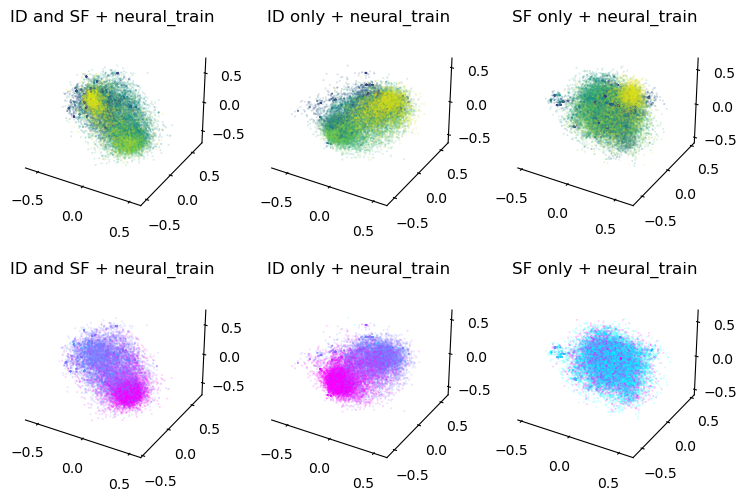

In [72]:
fig=plt.figure(figsize=(9,6))

ax1=plt.subplot(231, projection = '3d')
ax2=plt.subplot(232, projection = '3d')
ax3=plt.subplot(233, projection = '3d')

ax4=plt.subplot(234, projection = '3d')
ax5=plt.subplot(235, projection = '3d')
ax6=plt.subplot(236, projection = '3d')


ax1=cebra.plot_embedding(ax=ax1, embedding=cebra_posdir_all_m1, embedding_labels='time', title='ID and SF + neural_train')
ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all_m1, embedding_labels='time', title='ID only + neural_train')
ax3=cebra.plot_embedding(ax=ax3, embedding=cebra_dir_all_m1, embedding_labels='time', title='SF only + neural_train')

ax4=cebra.plot_embedding(ax=ax4, embedding=cebra_posdir_train_m1, embedding_labels=label_train[:,0], title='ID and SF + neural_train')
ax5=cebra.plot_embedding(ax=ax5, embedding=cebra_pos_train_m1, embedding_labels=label_train[:,0], title='ID only + neural_train')
ax6=cebra.plot_embedding(ax=ax6, embedding=cebra_dir_train_m1, embedding_labels=label_train[:,1], title='SF only + neural_train')


# ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all, embedding_labels=label_train[:,0], title='ID only + all neural_data')


cebra-hybrid model

Text(0.5, 0.98, 'CEBRA Hybrid Model')

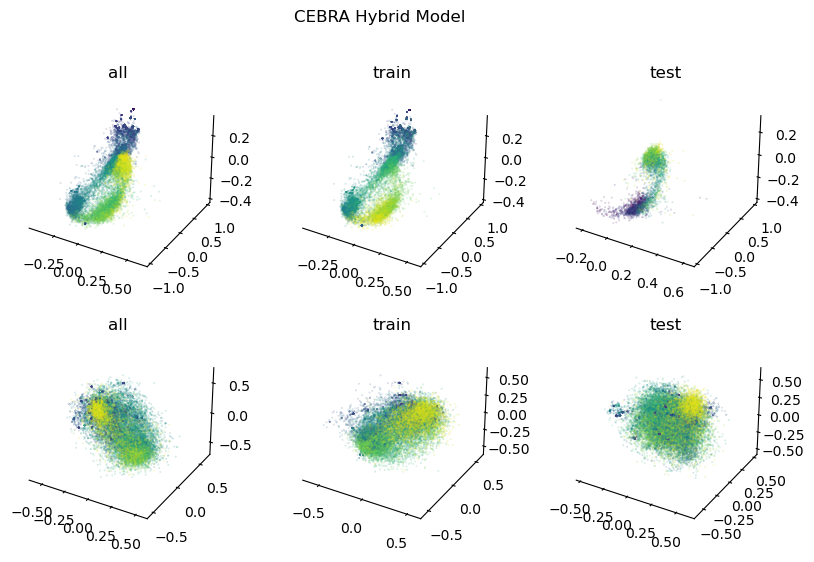

In [73]:
MI = 1000
OD = 32
current_datetime = '2024-05-06_19-41-47'
path = r"cebra_models\necab1\01\B\cebra_trialID_hybrid_model_1000_32_A.pt"

# cebra_pos_hybrid_model = cebra.CEBRA.load(f"decoding_models/cebra_trialID_hybrid_model_{MI}_{OD}_{M}_{P}_{current_datetime}.pt")
cebra_pos_hybrid_model_m1 = cebra.CEBRA.load(path)

cebra_hybrid_all_m1 = cebra_pos_hybrid_model_m1.transform(m1_neural_data)
cebra_pos_hybrid_train_m1 = cebra_pos_hybrid_model_m1.transform(neural_train)
cebra_pos_hybrid_test_m1 = cebra_pos_hybrid_model_m1.transform(neural_test)

plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,embedding=cebra_hybrid_all_m1, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=cebra_pos_hybrid_train_m1, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=cebra_pos_hybrid_test_m1, embedding_labels='time', title='test')
ax4 = cebra.plot_embedding(ax=ax4,embedding=cebra_posdir_all_m1, embedding_labels='time', title='all')
ax5 = cebra.plot_embedding(ax=ax5,embedding=cebra_pos_all_m1, embedding_labels='time', title='train')
ax6 = cebra.plot_embedding(ax=ax6,embedding=cebra_dir_all_m1, embedding_labels='time', title='test')
# add title
plt.suptitle('CEBRA Hybrid Model')

In [74]:
path_0 = 'necab1_50msFr_0.001LR_1500MI_outDim20_A_2024-04-01_18-57-17_timeOnly.cebra'

cebra_time_model_m1 = cebra.CEBRA.load(f'time_only_models/{path_0}')
cebra_time_all_m1 = cebra_time_model_m1.transform(m1_neural_data)
cebra_time_train_m1 = cebra_time_model_m1.transform(neural_train)
cebra_time_test_m1 = cebra_time_model_m1.transform(neural_test)

In [75]:
cebra_time_all_m1 = cebra_time_all_m1[:37590]
cebra_posdir_all_m1 = cebra_posdir_all_m1[:37590]


cebra_time_test_m1 = cebra_time_test_m1[:7014]
cebra_time_test_m1.shape

(7014, 20)

Text(0.5, 0.98, 'CEBRA-Time Model, M1')

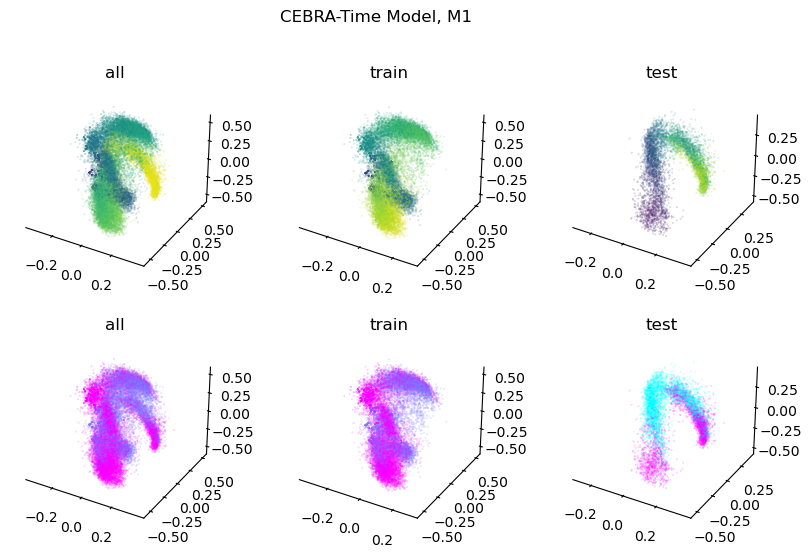

In [76]:


plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column


ax1 = cebra.plot_embedding(ax=ax1,embedding=cebra_time_all_m1, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=cebra_time_train_m1, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=cebra_time_test_m1, embedding_labels='time', title='test')
ax4 = cebra.plot_embedding(ax=ax4,embedding=cebra_time_all_m1, embedding_labels=discete_lables[:,0], title='all')
ax5 = cebra.plot_embedding(ax=ax5,embedding=cebra_time_train_m1, embedding_labels=label_train[:,0], title='train')
ax6 = cebra.plot_embedding(ax=ax6,embedding=cebra_time_test_m1, embedding_labels=label_test[:,0], title='test')

# add title
plt.suptitle('CEBRA-Time Model, M1')

In [80]:
# m1_embedding_train = cebra_time_train_m1
# m1_embedding_all = cebra_time_all_m1
# m1_embedding_all.shape

m1_embedding_train= cebra_posdir_train_m1
m1_embedding_all = cebra_hybrid_all_m1


Double check what you using to train the rnn

In [81]:
discete_lables.shape, mthal_embedding_all.shape

((37590, 2), (38220, 32))

Text(0.5, 0.98, 'checking embeddings used to train')

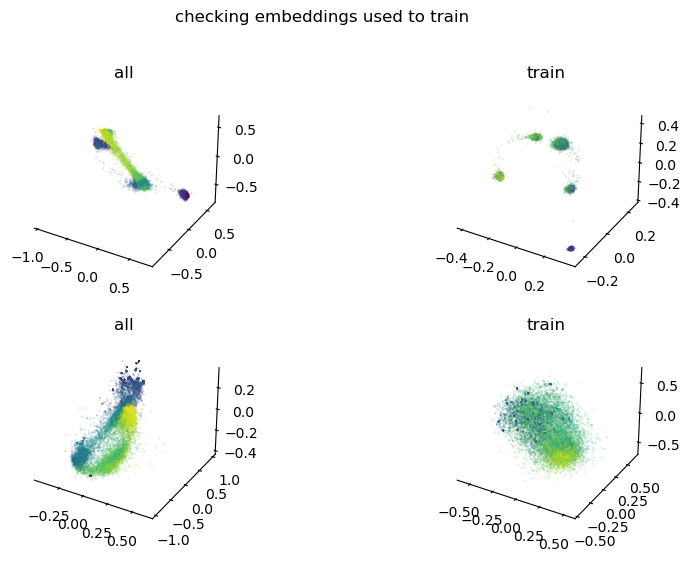

In [82]:

plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(221, projection='3d')  # First row, first column
ax2 = plt.subplot(222, projection='3d')  # First row, second column
ax3 = plt.subplot(223, projection='3d')  # First row, second column
ax4 = plt.subplot(224, projection='3d')  # First row, second column


ax1 = cebra.plot_embedding(ax=ax1,embedding=mthal_embedding_all, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=mthal_embedding_train, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=m1_embedding_all, embedding_labels='time', title='all')
ax4 = cebra.plot_embedding(ax=ax4,embedding=m1_embedding_train, embedding_labels='time', title='train')

# add title
plt.suptitle('checking embeddings used to train')

### 4. Convert Data into correctly shapped df

Turning neural_data and embedding data into to a df that is time bins by units for neural data. Or timebins by embeddings for embedding data
- you need each row to be a single time bin
- each column is a unit. 


In [83]:
mthal_neural_data_original

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 20., 20., 20.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [20.,  0., 40., ...,  0., 20.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 20.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [84]:
# Conver neural data into a df that is (bins , features) = (units, timebins)
data_mthal_neuralData_T = mthal_neural_data_original.T
data_mthal_neuralData = pd.DataFrame(data_mthal_neuralData_T)
data_mthal_neuralData = data_mthal_neuralData.ffill()
print(data_mthal_neuralData.shape)
data_mthal_neuralData.head(2)

(38220, 403)


0    1    2    3    4     5    6    7    8    9    ...  393  394  395  396  \
0  0.0  0.0  0.0  0.0  0.0  20.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    397  398  399   400  401  402  
0  20.0  0.0  0.0  20.0  0.0  0.0  
1   0.0  0.0  0.0   0.0  0.0  0.0  

[2 rows x 403 columns]

In [85]:
# Conver neural data into a df that is (bins , features) = (units, timebins)\
data_m1_neuralData_T = m1_neural_data_orignal.T
data_m1_neuralData = pd.DataFrame(data_m1_neuralData_T)
data_m1_neuralData = data_m1_neuralData.ffill()
print(data_m1_neuralData.shape)
data_m1_neuralData.head(2)

(38220, 12)


0    1    2    3    4    5    6    7    8    9    10   11
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

embeddings

In [86]:
# Conver neural embeddings into a df that is (bins , features) = (units, embeddings)
data_m1_embedding_T = m1_embedding_all
data_m1_embedding = pd.DataFrame(data_m1_embedding_T)
data_m1_embedding = data_m1_embedding.ffill()
print(data_m1_embedding.shape)
data_m1_embedding.head(2)

(38220, 32)


0         1         2         3         4         5         6   \
0 -0.080753  0.948898  0.293968  0.009452 -0.022508 -0.008114 -0.031147   
1 -0.080753  0.948898  0.293968  0.009452 -0.022508 -0.008114 -0.031147   

         7         8         9   ...        22        23        24        25  \
0 -0.003402 -0.000056 -0.017892  ...  0.002624  0.003579  0.024105 -0.016725   
1 -0.003402 -0.000056 -0.017892  ...  0.002624  0.003579  0.024105 -0.016725   

         26        27        28       29       30        31  
0 -0.000002 -0.017243 -0.004369 -0.02601  0.01612  0.002573  
1 -0.000002 -0.017243 -0.004369 -0.02601  0.01612  0.002573  

[2 rows x 32 columns]

In [87]:
# Conver neural embeddings into a df that is (bins , features) = (units, embeddings)
data_mthal_embedding_T = mthal_embedding_all
data_mthal_embedding = pd.DataFrame(data_mthal_embedding_T)
data_mthal_embedding = data_mthal_embedding.ffill()
print(data_mthal_embedding.shape)
data_mthal_embedding.head(2)

(38220, 32)


0         1         2         3         4         5         6   \
0  0.566425  0.457923 -0.666137 -0.031462 -0.026667  0.009410 -0.073129   
1  0.581416  0.462909 -0.647728 -0.025324 -0.036726  0.001631 -0.077521   

         7         8         9   ...        22        23        24        25  \
0 -0.026156  0.044276  0.010981  ...  0.004016 -0.033745 -0.026209 -0.059653   
1 -0.045029  0.057647  0.023640  ...  0.003614 -0.017646 -0.042246 -0.057405   

         26        27        28        29        30        31  
0 -0.017018 -0.009311 -0.030044 -0.004535 -0.014606 -0.022669  
1  0.008274 -0.011467 -0.028207 -0.004683  0.000926 -0.018854  

[2 rows x 32 columns]

<Axes3D: title={'center': 'ID only + neural_train'}>

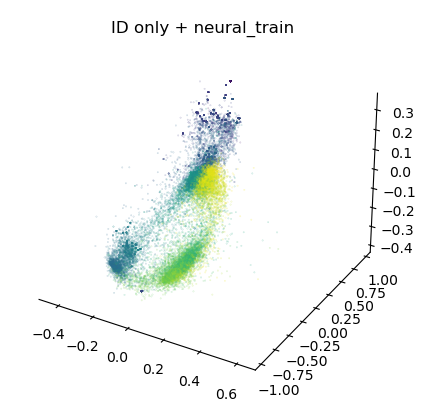

In [88]:
data_m1_embedding_T
cebra.plot_embedding(embedding=data_m1_embedding_T, embedding_labels='time', title='ID only + neural_train')

Covert which dataframes you want into data, so it can be fit into rest of code

In [89]:
# data = data_m1_neuralData
# data = data_mthal_neuralData
# data = data_mthal_embedding
# data = data_m1_embedding

In [90]:
data_mthal_embedding[0].to_numpy().shape

(38220,)

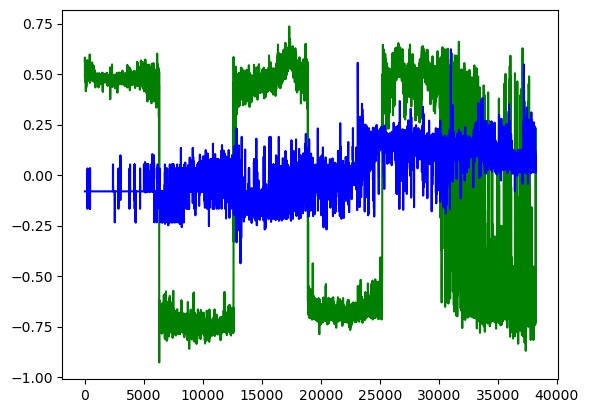

In [91]:
embedding_mthal = data_mthal_embedding[0].to_numpy()[0:61160] #base
embedding_m1 = data_m1_embedding[0].to_numpy()[0:61160] # pert1
plt.plot(embedding_mthal,color='green')
plt.plot(embedding_m1,color='blue')

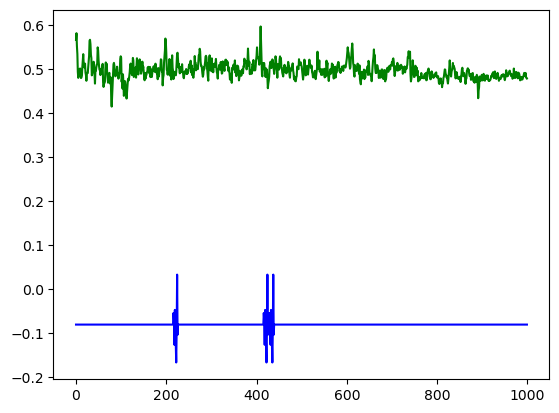

In [92]:
embedding_mthal = data_mthal_embedding[0].to_numpy()[0:1000] #base
embedding_m1 = data_m1_embedding[0].to_numpy()[0:1000] # pert1
plt.plot(embedding_mthal,color='green')
plt.plot(embedding_m1,color='blue')

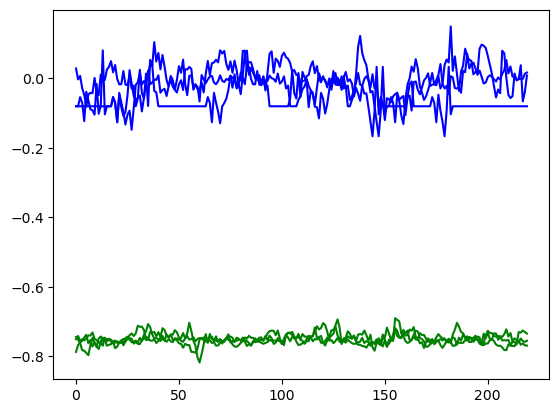

In [93]:
embedding_mthal = data_mthal_embedding[0].to_numpy()[11000:11220] #base
embedding_m1 = data_m1_embedding[0].to_numpy()[11000:11220] # pert1
plt.plot(embedding_mthal,color='green')
plt.plot(embedding_m1,color='blue')
embedding_mthal = data_mthal_embedding[0].to_numpy()[11220:11440] #base
embedding_m1 = data_m1_embedding[0].to_numpy()[11220:11440] # pert1
# embedding_5 = data_mthal_embedding[0].to_numpy()[25200:31500] # wash3
plt.plot(embedding_mthal,color='green')
plt.plot(embedding_m1,color='blue')
embedding_mthal = data_mthal_embedding[0].to_numpy()[11440:11660] #base
embedding_m1 = data_m1_embedding[0].to_numpy()[11440:11660] # pert1
# embedding_5 = data_mthal_embedding[0].to_numpy()[25200:31500] # wash3
plt.plot(embedding_mthal,color='green')
plt.plot(embedding_m1,color='blue')
# plt.plot(embedding_3,color='red')

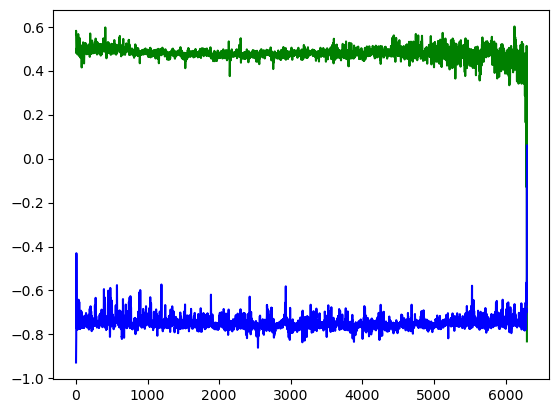

In [94]:
bins_per_trail = 210 * 30

embedding_1 = data_mthal_embedding[0].to_numpy()[0*bins_per_trail:bins_per_trail] #base
embedding_2 = data_mthal_embedding[0].to_numpy()[bins_per_trail:bins_per_trail*2] # pert1
embedding_3 = data_mthal_embedding[0].to_numpy()[bins_per_trail*2:bins_per_trail*3] # wash1
embedding_4 = data_mthal_embedding[0].to_numpy()[bins_per_trail*3:bins_per_trail*4] # pert2
embedding_5 = data_mthal_embedding[0].to_numpy()[bins_per_trail*5:bins_per_trail*5] # pert2
embedding_6 = data_mthal_embedding[0].to_numpy()[bins_per_trail*5:bins_per_trail*6] # pert2


plt.plot(embedding_1,color='green')
plt.plot(embedding_2,color='blue')
# plt.plot(embedding_3,color='red')
# plt.plot(embedding_4,color='lightblue')
# plt.plot(embedding_5,color='darkred')
# plt.plot(embedding_6,color='black')
plt.show()

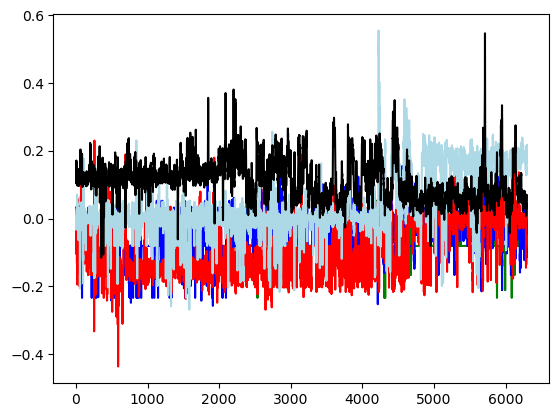

In [95]:
bins_per_trail = 210 * 30

embedding_1 = data_m1_embedding[0].to_numpy()[0*bins_per_trail:bins_per_trail] #base
embedding_2 = data_m1_embedding[0].to_numpy()[bins_per_trail:bins_per_trail*2] # pert1
embedding_3 = data_m1_embedding[0].to_numpy()[bins_per_trail*2:bins_per_trail*3] # wash1
embedding_4 = data_m1_embedding[0].to_numpy()[bins_per_trail*3:bins_per_trail*4] # pert2
embedding_5 = data_m1_embedding[0].to_numpy()[bins_per_trail*5:bins_per_trail*5] # pert2
embedding_6 = data_m1_embedding[0].to_numpy()[bins_per_trail*5:bins_per_trail*6] # pert2


plt.plot(embedding_1,color='green')
plt.plot(embedding_2,color='blue')
plt.plot(embedding_3,color='red')
plt.plot(embedding_4,color='lightblue')
plt.plot(embedding_5,color='darkred')
plt.plot(embedding_6,color='black')
plt.show()

check embeddings and FR of M1 and Mthal

In [96]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit

def view_units(unit_to_view,second_unit_to_view,third_unit_to_view,reaches_to_view):

    # Close any previous plots
    plt.close('all')

    # Create a new figure with a specific size
    fig = plt.figure(figsize=(15, 14))

    # First row
    ax1 = fig.add_subplot(431)  # First row, first column
    ax2 = fig.add_subplot(432)  # First row, second column
    ax3 = fig.add_subplot(433)  # First row, third column

    # Second row
    ax4 = fig.add_subplot(434)  # Second row, first column
    ax5 = fig.add_subplot(435)  # Second row, second column
    ax6 = fig.add_subplot(436)  # Second row, third column

    # Third row
    ax7 = fig.add_subplot(437)  # Third row, first column
    ax8 = fig.add_subplot(438)  # Third row, second column
    ax9 = fig.add_subplot(439)  # Third row, third column

    # Fourth row
    ax10 = fig.add_subplot(4, 3, 10,projection='3d')  # Fourth row, first column
    ax11 = fig.add_subplot(4, 3, 11,projection='3d')  # Fourth row, second column
    ax12 = fig.add_subplot(4, 3, 12, projection='3d')  # Fourth row, third column

 
    # Assuming data_mthal_neuralData_T and data_mthal_embedding_T are correctly set up
    for reach in reaches_to_view:
        # Calculate the start and end indices for each reach
        reach_start = reach * 210
        reach_end = reach_start + 210

        # Fetch data for the specified reach
        unit_frs = data_mthal_neuralData[unit_to_view].to_numpy()[reach_start:reach_end]
        second_unit_frs = data_mthal_neuralData[second_unit_to_view].to_numpy()[reach_start:reach_end]
        third_unit_frs = data_mthal_neuralData[third_unit_to_view].to_numpy()[reach_start:reach_end]


        unit_embedding = data_mthal_embedding[0].to_numpy()[reach_start:reach_end]
        second_unit_embedding = data_mthal_embedding[1].to_numpy()[reach_start:reach_end]
        third_unit_embedding = data_mthal_embedding[2].to_numpy()[reach_start:reach_end]


        embedding_1 = data_mthal_embedding[0].to_numpy()[reach_start:reach_end]
        embedding_2 = data_mthal_embedding[1].to_numpy()[reach_start:reach_end]
        embedding_3 = data_mthal_embedding[2].to_numpy()[reach_start:reach_end]

        
        embedding_1_m1 = data_m1_embedding[0].to_numpy()[reach_start:reach_end]
        embedding_2_m1 = data_m1_embedding[1].to_numpy()[reach_start:reach_end]
        embedding_3_m1 = data_m1_embedding[2].to_numpy()[reach_start:reach_end]

        # Plotting data for the specified reach, first unit
        ax1.plot(unit_frs, label=f'Reach {reach}')
        ax2.plot(second_unit_frs, label=f'Reach {reach}')
        ax3.plot(third_unit_frs, label=f'Reach {reach}')

        # Plotting data for the specified reach, second unit
        ax4.plot(embedding_1, label=f'Reach {reach}')
        ax5.plot(embedding_2, label=f'Reach {reach}')
        ax6.plot(embedding_3,  label=f'Reach {reach}')

        
        # Plotting data for the specified reach, second unit
        ax7.plot(embedding_1_m1, label=f'Reach {reach}')
        ax8.plot(embedding_2_m1, label=f'Reach {reach}')
        ax9.plot(embedding_3_m1,  label=f'Reach {reach}')

        ax10.plot(embedding_1, embedding_2, embedding_3, label=f'Reach {reach}')
        ax11.plot(embedding_1_m1, embedding_2_m1, embedding_3_m1, label=f'Reach {reach}')



    # Adding legends to each subplot
    # for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    #     ax.legend()
    # Setting titles for subplots, first unit
    ax1.set_title(f"Mtahl Unit {unit_to_view} Firing Rate")
    ax2.set_title(f"Mtahl Unit {second_unit_to_view} Firing Rate")
    ax3.set_title(f"Mtahl Unit {third_unit_to_view} Firing Rate")

    # Setting titles for subplots, second unit
    ax4.set_title("Mtahl First Embedding")
    ax5.set_title("Mtahl Second Embedding")
    ax6.set_title("Mtahl Third Embedding")

    ax7.set_title("M1 First Embedding")
    ax8.set_title("M1 Second Embedding")
    ax9.set_title("M1 Third Embedding")

    ax10.set_title("Mthal 3D Embedding")
    ax11.set_title("M1 3D Embedding")



    # Overall title for the figure
    fig.suptitle(f'Checking top 3 embeddings for M1 and Mthal at spefici reachs')

    # Show the plot
    plt.show()


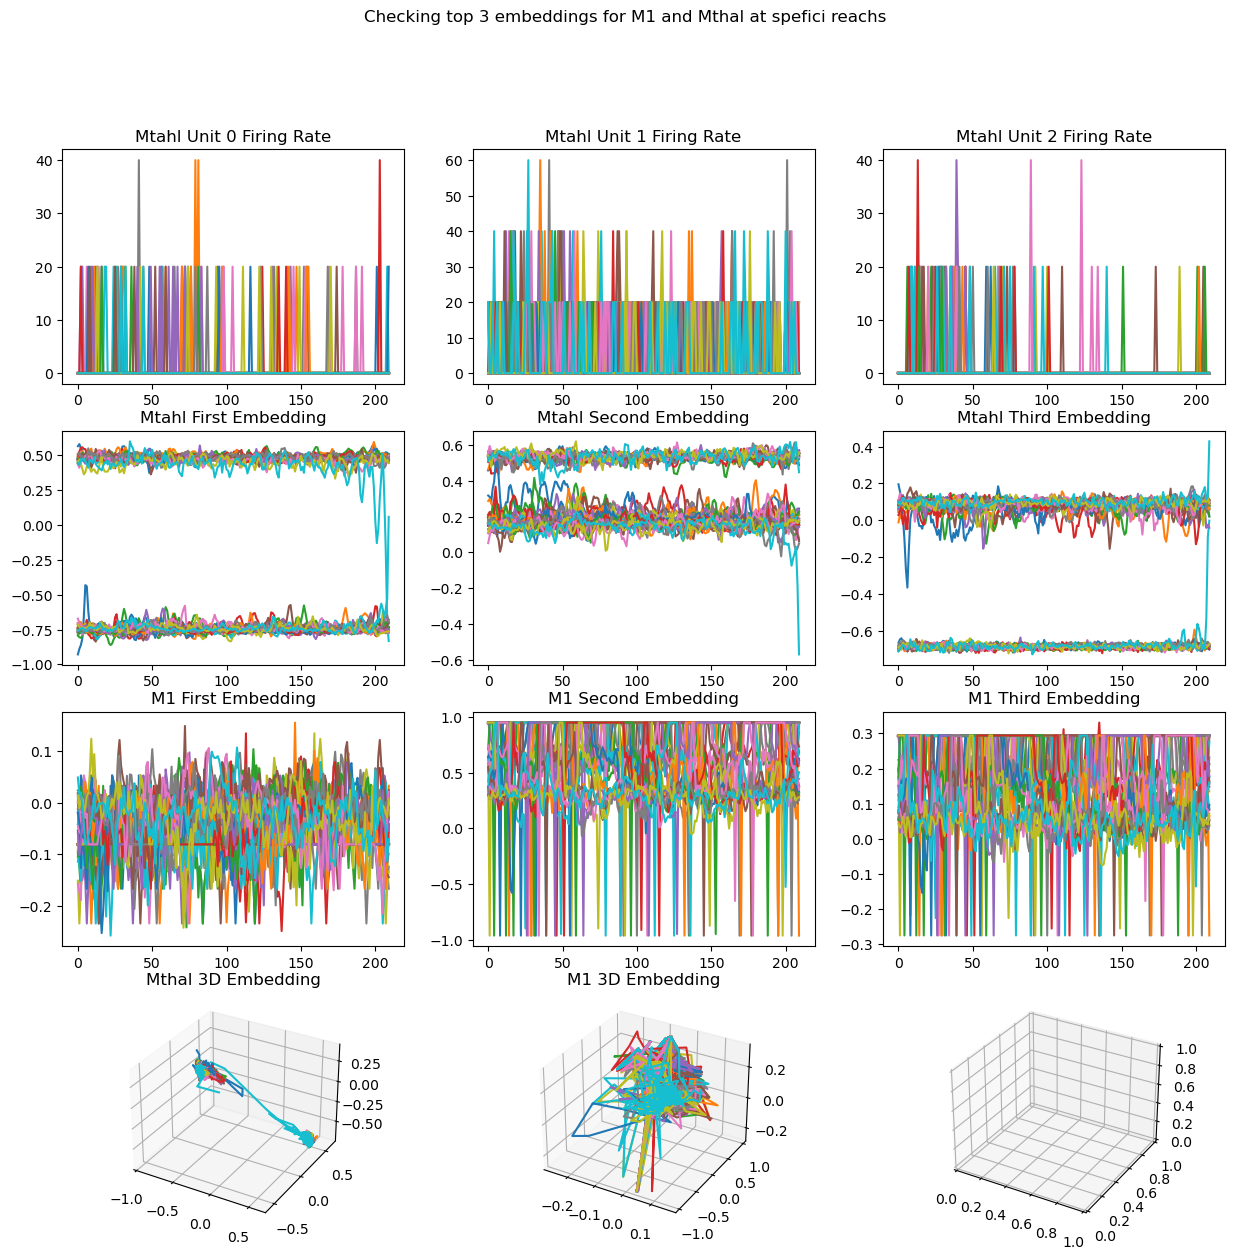

In [97]:
unit_to_view = 0
second_unit_to_view = 1  # Second unit to display
third_unit_to_view = 2
reaches_to_view = range(0, 60)  # Range of reaches to display
view_units(unit_to_view,second_unit_to_view,third_unit_to_view,reaches_to_view)

Convert Data frames into correct Input and Target Shapes

In [98]:
# data = data_m1_neuralData
# data = data_mthal_neuralData
# data = data_mthal_embedding
# data = data_m1_embedding

In [99]:
data_m1_embedding.head()

0         1         2         3         4         5         6   \
0 -0.080753  0.948898  0.293968  0.009452 -0.022508 -0.008114 -0.031147   
1 -0.080753  0.948898  0.293968  0.009452 -0.022508 -0.008114 -0.031147   
2 -0.080753  0.948898  0.293968  0.009452 -0.022508 -0.008114 -0.031147   
3 -0.080753  0.948898  0.293968  0.009452 -0.022508 -0.008114 -0.031147   
4 -0.080753  0.948898  0.293968  0.009452 -0.022508 -0.008114 -0.031147   

         7         8         9   ...        22        23        24        25  \
0 -0.003402 -0.000056 -0.017892  ...  0.002624  0.003579  0.024105 -0.016725   
1 -0.003402 -0.000056 -0.017892  ...  0.002624  0.003579  0.024105 -0.016725   
2 -0.003402 -0.000056 -0.017892  ...  0.002624  0.003579  0.024105 -0.016725   
3 -0.003402 -0.000056 -0.017892  ...  0.002624  0.003579  0.024105 -0.016725   
4 -0.003402 -0.000056 -0.017892  ...  0.002624  0.003579  0.024105 -0.016725   

         26        27        28       29       30        31  
0 -0.000002 -0.017243 -0.004369 -0.02601  0.01612  0.002573  
1 -0.000002 -0.017243 -0.004369 -0.02601  0.01612  0.002573  
2 -0.000002 -0.017243 -0.004369 -0.02601  0.01612  0.002573  
3 -0.000002 -0.017243 -0.004369 -0.02601  0.01612  0.002573  
4 -0.000002 -0.017243 -0.004369 -0.02601  0.01612  0.002573  

[5 rows x 32 columns]

In [100]:
data_mthal_embedding.head()

0         1         2         3         4         5         6   \
0  0.566425  0.457923 -0.666137 -0.031462 -0.026667  0.009410 -0.073129   
1  0.581416  0.462909 -0.647728 -0.025324 -0.036726  0.001631 -0.077521   
2  0.551941  0.509067 -0.641534 -0.011978 -0.033627  0.011789 -0.066019   
3  0.534077  0.516199 -0.660988 -0.000083 -0.037240  0.005886 -0.030963   
4  0.493315  0.537441 -0.673945 -0.015541 -0.001791  0.001414 -0.017344   

         7         8         9   ...        22        23        24        25  \
0 -0.026156  0.044276  0.010981  ...  0.004016 -0.033745 -0.026209 -0.059653   
1 -0.045029  0.057647  0.023640  ...  0.003614 -0.017646 -0.042246 -0.057405   
2 -0.037617  0.045781  0.018302  ...  0.022330 -0.005376 -0.024252 -0.058276   
3 -0.015804  0.029604  0.001237  ...  0.003334  0.000199 -0.022345 -0.023837   
4 -0.014359  0.012918  0.032585  ...  0.018518  0.003727 -0.017151 -0.042365   

         26        27        28        29        30        31  
0 -0.017018 -0.009311 -0.030044 -0.004535 -0.014606 -0.022669  
1  0.008274 -0.011467 -0.028207 -0.004683  0.000926 -0.018854  
2  0.007494 -0.008791 -0.035133  0.008056  0.011871 -0.037800  
3  0.024778 -0.012486  0.006096  0.013332  0.020491 -0.014189  
4  0.032629 -0.019847 -0.012630  0.029174 -0.005549  0.012339  

[5 rows x 32 columns]

Adapt the neural or embedding data into train, validate and test sets

In [102]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming data_mthal_embedding and data_m1_embedding are your DataFrame names:
PREDICTORS = data_mthal_embedding.columns  # These are all columns in the Mthal embedding DataFrame
TARGET = data_m1_embedding.columns  # These are all columns in the M1 embedding DataFrame


scale the data. take the mean of columns and find SD and so on

In [103]:
scale_taret = True

In [224]:
# # Initialize scaler
# scaler = StandardScaler()

# if scale_taret:
#     # Scale Mthal embedding data (predictors)
#     data_mthal_embedding_scaled = pd.DataFrame(scaler.fit_transform(data_mthal_embedding), columns=PREDICTORS)

# if scale_taret == False:
#     data_mthal_embedding_scaled = data_mthal_embedding
    
# # Optionally scale M1 embedding data (targets) if needed
# if scale_taret:
#     data_m1_embedding_scaled = pd.DataFrame(scaler.fit_transform(data_m1_embedding), columns=TARGET)
#     print('scaling Target Embeddings')

# # Use M1 embedding data as is if not scaling
# if scale_taret == False:
#     data_m1_embedding_scaled = data_m1_embedding  # Not scaled, just renaming for consistency in downstream code
#     print('Not scaling Target Embeddings')


scaling Target Embeddings


In [104]:
# Split data into training, validation, and test sets first
total_samples = len(data_mthal_embedding)
train_size = int(0.70 * total_samples)
valid_size = int(0.85 * total_samples)

# Split predictors (Mthal embeddings)
train_x = data_mthal_embedding.iloc[:train_size]
valid_x = data_mthal_embedding.iloc[train_size:valid_size]
test_x = data_mthal_embedding.iloc[valid_size:]

# Split targets (M1 embeddings)
train_y = data_m1_embedding.iloc[:train_size]
valid_y = data_m1_embedding.iloc[train_size:valid_size]
test_y = data_m1_embedding.iloc[valid_size:]

In [106]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler for predictors (Mthal embeddings)
scaler_predictors = StandardScaler()

# Fit and transform the training predictors
train_x = scaler_predictors.fit_transform(train_x)
# Transform the validation and test predictors
valid_x = scaler_predictors.transform(valid_x)
test_x = scaler_predictors.transform(test_x)

# Initialize and apply the scaler for targets (M1 embeddings), if scaling the targets

scaler_targets = StandardScaler()
train_y = scaler_targets.fit_transform(train_y)
valid_y = scaler_targets.transform(valid_y)
test_y = scaler_targets.transform(test_y)
print('Scaling Target Embeddings')



Scaling Target Embeddings


checking the scalled embeddings vs the normal unscalled
- The scaled and non-scalled embeddings should look the same, but have different axis values

In [107]:
# Using .values to convert DataFrame to array
array_m1_embedding = data_m1_embedding_scaled.values
# Check the shape to ensure it is (61160, 20)
print("Shape of array:", array_m1_embedding.shape)

cebra.plot_embedding(embedding=data_m1_embedding_T, embedding_labels='time', title='orignal M1 embeddings')
cebra.plot_embedding(embedding=array_m1_embedding, embedding_labels='time', title='Scaled M1 embeddings')


NameError: name 'data_m1_embedding_scaled' is not defined

In [108]:
# Using .values to convert DataFrame to array
array_mthal_embedding = data_mthal_embedding_scaled.values
# Check the shape to ensure it is (61160, 20)
print("Shape of array:", array_m1_embedding.shape)

cebra.plot_embedding(embedding=data_mthal_embedding_T, embedding_labels='time', title='original Mthal embeddings')
cebra.plot_embedding(embedding=array_mthal_embedding, embedding_labels='time', title='scaled Mthal embeddings')


NameError: name 'data_mthal_embedding_scaled' is not defined

Split scaled Data into Train, Validate, and Test Sets

In [109]:
# Combine scaled data into a single DataFrame if needed for splitting (here, not technically necessary)
# We can split directly using indices because our data is already aligned in time

# Determine split sizes
total_samples = len(data_mthal_embedding)
print(f'total samples: {total_samples}')

train_size = int(0.70 * total_samples)
valid_size = int(0.85 * total_samples)
print(f'train_size: {train_size}')
print(f'valid_size: {valid_size}')


# Split data into training, validation, and test sets
train_x = data_mthal_embedding_scaled.iloc[:train_size].to_numpy()
train_y = data_m1_embedding_scaled.iloc[:train_size].to_numpy()

valid_x = data_mthal_embedding_scaled.iloc[train_size:valid_size].to_numpy()
valid_y = data_m1_embedding_scaled.iloc[train_size:valid_size].to_numpy()

test_x = data_mthal_embedding_scaled.iloc[valid_size:].to_numpy()
test_y = data_m1_embedding_scaled.iloc[valid_size:].to_numpy()




total samples: 38220
train_size: 26754
valid_size: 32487


NameError: name 'data_mthal_embedding_scaled' is not defined

In [110]:
print("Train X:", train_x.shape, train_x[0][0:3])
print("Train Y:", train_y.shape, train_y[0][0:3])
print("Validation X:", valid_x.shape, valid_x[0][0:3])
print("Validation Y:", valid_y.shape, valid_y[0][0:3])
print("Test X:", test_x.shape, test_x[0][0:3])
print("Test Y:", test_y.shape, test_y[0][0:3])
42812 + 9174 

Train X: (26754, 32) [ 1.08475159  0.89034979 -1.71310421]
Train Y: (26754, 32) [-0.50050748  1.08403986  1.12313106]
Validation X: (5733, 32) [ 1.04876198 -1.57880691  0.79756559]
Validation Y: (5733, 32) [ 2.06966632 -1.37143254 -1.37663241]
Test X: (5733, 32) [ 0.72762948 -1.33979434  0.80505469]
Test Y: (5733, 32) [ 1.69867546 -1.55886432 -1.6494122 ]


51986

In [111]:
import torch

# Convert scaled and split data into PyTorch tensors
train_input_tensor = torch.tensor(train_x, dtype=torch.float32)
valid_input_tensor = torch.tensor(valid_x, dtype=torch.float32)
test_input_tensor = torch.tensor(test_x, dtype=torch.float32)

train_target_tensor = torch.tensor(train_y, dtype=torch.float32)
valid_target_tensor = torch.tensor(valid_y, dtype=torch.float32)
test_target_tensor = torch.tensor(test_y, dtype=torch.float32)


# Create a TensorDataset
train_dataset = TensorDataset(train_input_tensor, train_target_tensor)
val_dataset = TensorDataset(valid_input_tensor, valid_target_tensor)
test_dataset =  TensorDataset(test_input_tensor, test_target_tensor)


# Optionally create a validation dataset using the remaining data if needed
train_input_tensor.shape, train_target_tensor.shape, valid_input_tensor.shape, valid_target_tensor.shape, test_input_tensor.shape, test_target_tensor.shape

NameError: name 'TensorDataset' is not defined

Split discete_lables up to match the index location used for train_x, valid_x and test_x

In [229]:
label_test_split = discete_lables[51986:]
label_test_split.shape

(0, 2)

looking at embeddings used for training, validation and test sets

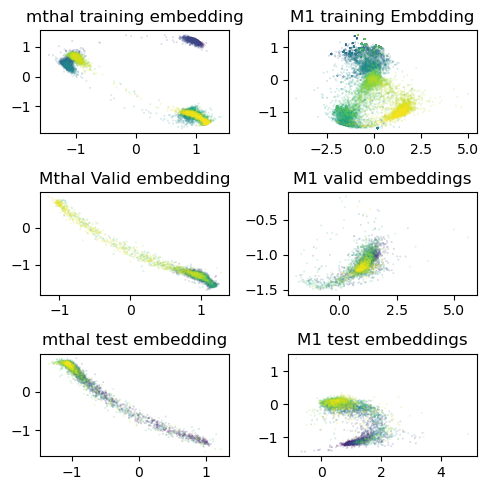

In [230]:
plt.figure(figsize=(5, 5))

index_order = (0,1)

# Creating each subplot in the 3x2 grid
ax1 = plt.subplot(321)  # First row, first column
ax2 = plt.subplot(322)  # First row, second column
ax3 = plt.subplot(323)  # Second row, first column
ax4 = plt.subplot(324)  # Second row, second column
ax5 = plt.subplot(325)  # Third row, first column
ax6 = plt.subplot(326)  # Third row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_order,embedding=train_x, embedding_labels='time', title='mthal training embedding')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order,embedding=train_y, embedding_labels='time', title='M1 training Embdding')
ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_order,embedding=valid_x, embedding_labels='time', title='Mthal Valid embedding')
ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order,embedding=valid_y, embedding_labels='time', title='M1 valid embeddings')
ax5 = cebra.plot_embedding(ax=ax5,idx_order=index_order,embedding=test_x, embedding_labels='time', title='mthal test embedding')
ax6 = cebra.plot_embedding(ax=ax6,idx_order=index_order,embedding=test_y, embedding_labels='time', title='M1 test embeddings')
plt.tight_layout()  # Adjust subplots to fit into figure area.


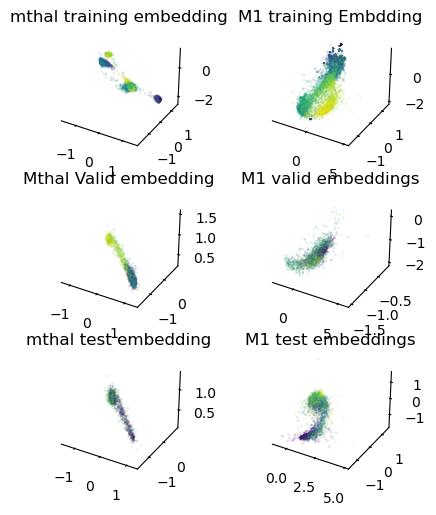

In [231]:
plt.figure(figsize=(5, 5))

index_order = (0,1,2)

# Creating each subplot in the 3x2 grid
ax1 = plt.subplot(321, projection='3d')  # First row, first column
ax2 = plt.subplot(322, projection='3d')  # First row, second column
ax3 = plt.subplot(323, projection='3d')  # Second row, first column
ax4 = plt.subplot(324, projection='3d')  # Second row, second column
ax5 = plt.subplot(325, projection='3d')  # Third row, first column
ax6 = plt.subplot(326, projection='3d')  # Third row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_order,embedding=train_x, embedding_labels='time', title='mthal training embedding')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order,embedding=train_y, embedding_labels='time', title='M1 training Embdding')
ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_order,embedding=valid_x, embedding_labels='time', title='Mthal Valid embedding')
ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order,embedding=valid_y, embedding_labels='time', title='M1 valid embeddings')
ax5 = cebra.plot_embedding(ax=ax5,idx_order=index_order,embedding=test_x, embedding_labels='time', title='mthal test embedding')
ax6 = cebra.plot_embedding(ax=ax6,idx_order=index_order,embedding=test_y, embedding_labels='time', title='M1 test embeddings')
plt.tight_layout()  # Adjust subplots to fit into figure area.


<Axes3D: title={'center': 'training M1 Target embeddings'}>

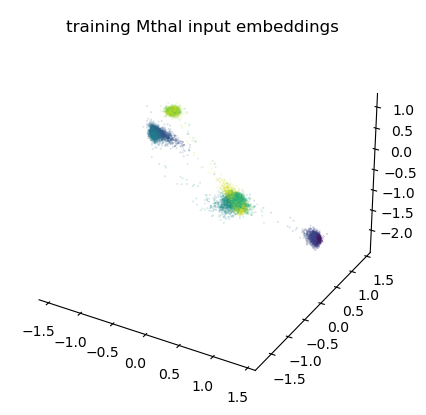

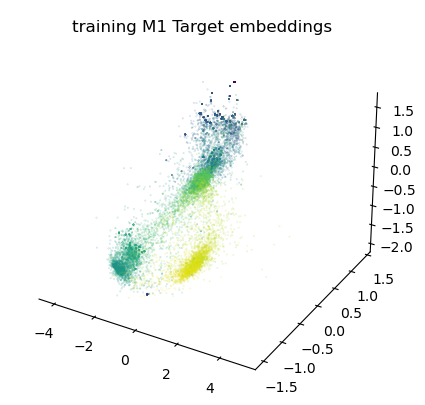

In [232]:

cebra.plot_embedding(embedding=train_x, embedding_labels='time', title='training Mthal input embeddings')
cebra.plot_embedding(embedding=train_y, embedding_labels='time', title='training M1 Target embeddings')

### 2. Construct RNN

In [233]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

prepare input and target data

In [234]:
# input = train_x
# target = train_y
# test_input = test_x
# test_target = test_y
# input.shape, target.shape, test_input.shape,  test_target.shape

In [235]:
print("Train X:", train_x.shape, train_x[0][0:3])
print("Train Y:", train_y.shape, train_y[0][0:3])
print("Validation X:", valid_x.shape, valid_x[0][0:3])
print("Validation Y:", valid_y.shape, valid_y[0][0:3])
print("Test X:", test_x.shape, test_x[0][0:3])
print("Test Y:", test_y.shape, test_y[0][0:3])
42812 + 9174 + 9174

Train X: (26754, 32) [ 1.11442689  1.03704398 -2.13499856]
Train Y: (26754, 32) [-0.84426624  1.38383951  1.40864548]
Validation X: (5733, 32) [ 1.07765809 -1.39770815  0.63511914]
Validation Y: (5733, 32) [ 1.35437365 -1.02481557 -1.02968212]
Test X: (5733, 32) [ 0.7495729  -1.16202592  0.64338216]
Test Y: (5733, 32) [ 1.03701173 -1.20867367 -1.29575788]


61160

In [236]:
# Now reshape input and target tensors for the training set
train_input_tensor = torch.tensor(train_x)  # Reshape to (222, 210, 32)
train_target_tensor = torch.tensor(train_y) # Reshape to (222, 210, 32)
valid_input_tensor = torch.tensor(valid_x)
valid_target_tensor = torch.tensor(valid_y)
test_input_tensor = torch.tensor(test_x)
test_target_tensor = torch.tensor(test_y)


# Convert the existing tensors to float32 if they are not already
input_tensor = train_input_tensor.float()
target_tensor = train_target_tensor.float()
valid_input_tensor = valid_input_tensor.float()
valid_target_tensor = valid_target_tensor.float()
test_input_tensor = test_input_tensor.float()
test_target_tensor = test_target_tensor.float()


# Create a TensorDataset
train_dataset = TensorDataset(train_input_tensor, train_target_tensor)
val_dataset = TensorDataset(valid_input_tensor, valid_target_tensor)
test_dataset =  TensorDataset(test_input_tensor, test_target_tensor)


# Optionally create a validation dataset using the remaining data if needed
train_input_tensor.shape, train_target_tensor.shape, valid_input_tensor.shape, valid_target_tensor.shape, test_input_tensor.shape, test_target_tensor.shape

(torch.Size([26754, 32]),
 torch.Size([26754, 32]),
 torch.Size([5733, 32]),
 torch.Size([5733, 32]),
 torch.Size([5733, 32]),
 torch.Size([5733, 32]))

In [237]:
# Convert tensors to float32 before creating the dataset
train_input_tensor = torch.tensor(train_x, dtype=torch.float32)
train_target_tensor = torch.tensor(train_y, dtype=torch.float32)
valid_input_tensor = torch.tensor(valid_x, dtype=torch.float32)
test_input_tensor = torch.tensor(test_x, dtype=torch.float32)
test_target_tensor = torch.tensor(test_y, dtype=torch.float32)



testing batching and randomizing inputs

In [238]:
# from torch.utils.data import Dataset, DataLoader
# import random

# class create_randomized_Datasets(Dataset):
#     def __init__(self, features, labels, sequence_length=7):
#         self.features = features
#         self.labels = labels
#         self.sequence_length = sequence_length

#     def __len__(self):
#         return len(self.labels) - self.sequence_length + 1

#     def __getitem__(self, index):
#         idx = random.randint(0, len(self.labels) - self.sequence_length)
#         print(idx)
#         return (self.features[idx:idx + self.sequence_length], self.labels[idx:idx + self.sequence_length])

# # Assuming 'features' and 'labels' are your full datasets
# train_dataset = create_randomized_Datasets(train_input_tensor, train_target_tensor)
# valid_dataset =  create_randomized_Datasets(valid_input_tensor, valid_target_tensor)
# test_dataset = create_randomized_Datasets(test_input_tensor, test_target_tensor)
# #train_loader = DataLoader(dataset, batch_size=1, shuffle=False)  # Shuffle here might not be necessary

# # Create DataLoaders
# batch_size = 64
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
# val_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [239]:
# class create_nonRandom_datasets(Dataset):
#     def __init__(self, features, labels, sequence_length=220):
#         self.features = features
#         self.labels = labels
#         self.sequence_length = sequence_length
#         self.indices = [(i, i + sequence_length) for i in range(len(labels) - sequence_length + 1)]

#     def __len__(self):
#         return len(self.indices)

#     def __getitem__(self, index):
#         start, end = self.indices[index]
#         return self.features[start:end], self.labels[start:end]

# # Assuming 'features' and 'labels' are your full datasets
# train_dataset = create_nonRandom_datasets(train_input_tensor, train_target_tensor)
# valid_dataset =  create_nonRandom_datasets(valid_input_tensor, valid_target_tensor)
# test_dataset = create_nonRandom_datasets(test_input_tensor, test_target_tensor)

# #train_loader = DataLoader(dataset, batch_size=1, shuffle=False)  # Shuffle here might not be necessary

# # Create DataLoaders
# batch_size = 1
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# val_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [240]:
from torch.utils.data import Dataset, DataLoader
import torch

class ReachDataset(Dataset):
    def __init__(self, features, labels, sequence_length=210):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)
        self.sequence_length = sequence_length

    def __len__(self):
        # Calculate number of full reaches in the dataset
        return len(self.features) // self.sequence_length

    def __getitem__(self, index):
        # Get the full reach sequence
        start = index * self.sequence_length
        end = start + self.sequence_length
        return self.features[start:end], self.labels[start:end]

# Assuming 'features' and 'labels' are your full datasets
train_dataset = ReachDataset(train_input_tensor, train_target_tensor)
valid_dataset =  ReachDataset(valid_input_tensor, valid_target_tensor)
test_dataset = ReachDataset(test_input_tensor, test_target_tensor)
# Create DataLoader
batch_size = 32  # Adjust based on your system's memory and the model's capacity
# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

C:\Users\user\AppData\Local\Temp\ipykernel_16264\1392206443.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.features = torch.tensor(features, dtype=torch.float32)
C:\Users\user\AppData\Local\Temp\ipykernel_16264\1392206443.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.labels = torch.tensor(labels, dtype=torch.float32)


Testing weather model

In [1]:
class NeuralRNN(nn.Module):
    def __init__(self, input_size=32, hidden_size=64, num_layers=1, output_size=32, dropout=0.5):
        super(NeuralRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # Apply dropout to each RNN layer except the last layer
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout if num_layers > 1 else 0)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out)  # Apply the linear layer to each time step
        return out

# Create an instance of the NeuralRNN
neural_rnn = NeuralRNN()

NameError: name 'nn' is not defined

### 3. Train RNN 
- Input: Mthal embedding data
- Targert: M1 embedding data
- Output: Predicted M1 embedding data

In [242]:
num_epochs = 1000
lr = 0.0002
weight_decay = True
early_stop = True

# Initialize early stopping criteria
early_stopping_patience = 10
min_val_loss = float('inf')
stop_counter = 0

In [243]:
i = 0
for inputs, targets in train_loader:
    i +=1
    print(f'Epoch {i}')
    print(inputs.shape)
    print(targets.shape)
    print(inputs[0][0].shape, inputs[0][0])
    print(targets[0][0].shape, targets[0][0])
    break

Epoch 1
torch.Size([32, 210, 32])
torch.Size([32, 210, 32])
torch.Size([32]) tensor([-1.0474,  0.7000,  0.4246, -0.8313,  1.2381, -0.6425,  0.6990, -1.0331,
        -0.5228,  1.0352,  1.1895,  0.6331,  1.2118,  0.3585,  0.2370, -1.5335,
        -0.6983,  1.1933,  0.8713,  1.2150, -1.4028, -0.8143,  0.8612, -0.2785,
        -0.9377, -0.7826,  0.1396,  1.1844,  0.8747,  0.0492,  1.1164,  1.1207])
torch.Size([32]) tensor([-0.2638,  0.0645,  0.1058, -1.3386,  1.5279, -0.3429,  1.6582, -0.0598,
         0.3393,  1.2332, -1.4080, -1.4571, -1.0515, -1.4965,  0.5015, -1.4538,
        -0.0868, -0.8068,  1.3438, -0.2019,  1.6450,  1.5537,  0.1828,  1.3671,
        -1.6660,  1.3466, -0.5416,  0.6329, -0.8369,  1.5480, -1.5288, -1.0348])


In [244]:

for inputs, targets in val_loader:
    print(inputs.shape)
    print(targets.shape)
    print(inputs[0][1].shape, inputs[0][1])
    print(targets[0][1].shape, targets[0][1])
    break


torch.Size([27, 210, 32])
torch.Size([27, 210, 32])
torch.Size([32]) tensor([ 1.0877, -1.3725,  0.5587, -0.3661, -0.7461, -0.2273, -1.3348, -0.2081,
        -0.5758,  0.0560, -0.5211, -1.2152, -0.2966, -1.1496, -1.0974,  0.6611,
        -0.5420, -0.3435, -1.2143, -0.2804,  0.4742,  0.8499,  0.3219, -0.5503,
        -0.4255, -0.8018,  0.7946, -0.8120, -1.1843,  0.9973, -0.9645, -0.1091])
torch.Size([32]) tensor([ 1.2968, -1.0358, -0.9766,  1.5326, -0.6348,  1.5794, -1.1158,  1.2256,
        -0.4236, -1.5565,  0.6628,  1.1127,  0.4342,  1.1226, -1.2808,  1.4021,
        -1.0244,  0.3521, -0.1183,  0.8012, -0.7602, -1.1659, -1.3628, -1.0371,
         1.2013, -0.4196,  1.3318,  0.4064,  1.4648, -0.5484,  0.9756, -0.5076])


In [245]:
for inputs, targets in test_loader:
    print(inputs.shape)
    print(targets.shape)
    print(inputs[0][1].shape, inputs[0][1])
    print(targets[0][1].shape, targets[0][1])
    break

torch.Size([27, 210, 32])
torch.Size([27, 210, 32])
torch.Size([32]) tensor([ 0.6239, -1.0448,  0.7790, -1.3043,  0.0374, -1.2290, -1.3942, -0.7983,
        -0.3854,  0.9013, -0.1103, -1.5950,  0.1538, -1.9420, -1.5714,  0.4921,
        -1.6359,  0.4191, -1.2474,  0.1140,  0.6245,  1.3126,  1.1174, -1.7966,
        -1.5014, -1.7059,  2.1049,  0.0386, -1.4471,  1.9258, -1.0751,  0.3011])
torch.Size([32]) tensor([ 1.0422, -1.2224, -1.2290,  1.1085, -0.9418,  0.9547, -1.1264,  0.5615,
        -1.2793, -1.1202,  0.8752,  0.8285,  0.2977,  0.8715, -0.6616,  1.2321,
        -0.3369,  0.2334, -0.7038,  0.5411, -0.9417, -1.3062, -0.4134, -1.0825,
         1.0507, -0.7569,  0.5543,  0.2220,  1.3779, -0.7478,  1.1159, -0.3612])


Old training Loop

In [246]:
num_epochs = 100
lr = 0.0003
weight_decay = True
early_stop = True

# Initialize early stopping criteria
early_stopping_patience = 10
min_val_loss = float('inf')
stop_counter = 0

In [247]:
import torch
loss_function = torch.nn.MSELoss()  # Mean Squared Error Loss, or choose another appropriate to your task

optimizer = torch.optim.Adam(neural_rnn.parameters(), lr=lr)  # Using Adam optimizer

if weight_decay:
    optimizer = torch.optim.Adam(neural_rnn.parameters(), lr=lr, weight_decay=0.01)  # Adding L2 regularization

predictions = []
valid_predictions = []
weight_history = []
# Assuming neural_rnn, train_loader, and val_loader are already defined
for epoch in range(num_epochs):
    # Training phase
   
    neural_rnn.train()  # Set the model to training mode
    train_loss = 0.0
    all_outputs = []
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear the gradients
        outputs = neural_rnn(inputs)  # Forward pass: compute the output
        loss = loss_function(outputs, targets)
        loss.backward()  # Backward pass: compute the gradient of the loss with respect to model parameters
        optimizer.step()  # Update parameters
        train_loss += loss.item() * inputs.size(0)  # Multiply by batch size to undo averaging in loss calculation
        all_outputs.append(outputs)

        # Save weights
        layer_weights = {name: parameter.data.clone() for name, parameter in neural_rnn.named_parameters()}
        weight_history.append(layer_weights)
    all_outputs = torch.cat(all_outputs, dim=0)  # Concatenate along the batch dimension
    train_loss /= len(train_loader.dataset)  # Average loss for the epoch

    # Validation phase
    neural_rnn.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    all_val_outputs = []
    with torch.no_grad():  # Turn off gradients for validation, saves memory and computations
        for inputs, targets in val_loader:
            outputs_val = neural_rnn(inputs)
            loss = loss_function(outputs_val, targets)
            val_loss += loss.item() * inputs.size(0)
            all_val_outputs.append(outputs_val)

    all_val_outputs = torch.cat(all_val_outputs, dim=0)  
    val_loss /= len(val_loader.dataset)  # Average loss for the epoch

    
    # # Early stopping check
    if early_stop:
        if val_loss < min_val_loss:
            min_val_loss = val_loss
            stop_counter = 0  # reset the counter if improvement is seen
        else:
            stop_counter += 1
        if stop_counter >= early_stopping_patience:
            print(f"Stopping early at epoch {epoch+1}")
            break

    # Print epoch statistics every 100 epochs
    if epoch % 5 == 0:
        print(f'Epoch {epoch+1} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {val_loss:.4f}')


Epoch 1 	Training Loss: 1.0115 	Validation Loss: 1.0769
Epoch 6 	Training Loss: 0.8229 	Validation Loss: 1.0107
Epoch 11 	Training Loss: 0.7035 	Validation Loss: 0.9973
Epoch 16 	Training Loss: 0.6370 	Validation Loss: 1.0218
Stopping early at epoch 20


In [248]:
output_predictions = all_outputs.detach().numpy()
print(output_predictions.shape)

# Reshape the data
output_predictions_flat = output_predictions.reshape(-1, 32)

# Check the new shape
print("New shape:", output_predictions_flat.shape)

discete_lables.shape, output_predictions_flat.shape
train_lables_discrete = discete_lables[0:26670]
train_lables_discrete.shape

train_target_tensor = train_target_tensor.detach().numpy()
train_target_tensor = train_target_tensor[0:26670]

(127, 210, 32)
New shape: (26670, 32)


Text(0.5, 0.98, 'M1 Vs. Rnn embeddings')

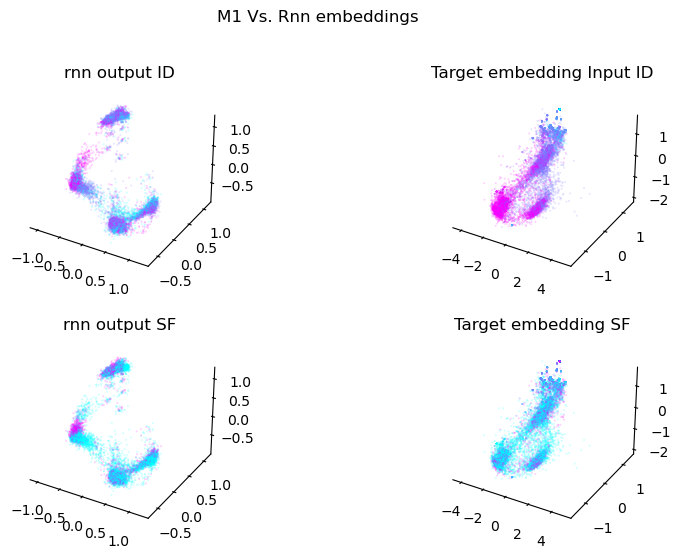

In [249]:
plt.figure(figsize=(10, 6))

index_order = (0,1,2)


#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(221, projection='3d')  # First row, first column
ax2 = plt.subplot(222, projection='3d')  # First row, second column
ax3 = plt.subplot(223, projection='3d')  # First row, second column
ax4 = plt.subplot(224, projection='3d')  # First row, second column
# ax5 = plt.subplot(225, projection='3d')  # First row, second column
# ax6 = plt.subplot(226, projection='3d')  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_order,embedding=output_predictions_flat, embedding_labels=train_lables_discrete[:,0], title='rnn output ID')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order,embedding=train_target_tensor, embedding_labels=train_lables_discrete[:,0], title='Target embedding Input ID')
ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_order,embedding=output_predictions_flat, embedding_labels=train_lables_discrete[:,1], title='rnn output SF')
ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order,embedding=train_target_tensor, embedding_labels=train_lables_discrete[:,1], title='Target embedding SF')
# ax5 = cebra.plot_embedding(ax=ax5,idx_order=index_order,embedding=output_predictions_flat, embedding_labels=train_lables_discrete[:,1], title='rnn output SF')
# ax6 = cebra.plot_embedding(ax=ax6,idx_order=index_order,embedding=train_target_tensor, embedding_labels=train_lables_discrete[:,1], title='Target embedding SF')
# add title
plt.suptitle('M1 Vs. Rnn embeddings')

Learning Rate and Optimizer Configuration

In [250]:
# from torch.optim.lr_scheduler import StepLR

# optimizer = torch.optim.Adam(neural_rnn.parameters(), lr=0.001, weight_decay=0.01)
# scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

# for epoch in range(num_epochs):
#     for inputs, targets in train_loader:
#         optimizer.zero_grad()
#         outputs = neural_rnn(inputs)
#         loss = loss_function(outputs, targets)
#         loss.backward()
#         optimizer.step()
#     scheduler.step()


Another training loop

In [251]:
# from torch.utils.tensorboard import SummaryWriter

# writer = SummaryWriter()
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

# for epoch in range(num_epochs):
#     train_loss = 0.0
#     for inputs, targets in train_loader:
#         outputs = neural_rnn(inputs)
#         loss = loss_function(outputs, targets)
#         # Backpropagation
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#         train_loss += loss.item()
    
#     train_loss /= len(train_loader)
#     writer.add_scalar('Loss/Train', train_loss, epoch)

#     # Validation phase
#     val_loss = 0.0
#     neural_rnn.eval()
#     with torch.no_grad():
#         for inputs, targets in val_loader:
#             outputs = neural_rnn(inputs)
#             loss = loss_function(outputs, targets)
#             val_loss += loss.item()
    
#     val_loss /= len(val_loader)
#     writer.add_scalar('Loss/Validation', val_loss, epoch)

#       # Print epoch statistics every 100 epochs
#     print(f'Epoch {epoch+1} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {val_loss:.4f}')


# writer.close()

In [252]:
# output_predictions = all_outputs.detach().numpy()
# print(output_predictions.shape)

# # If you want each batch's data separately
# output_predictions_batch1 = output_predictions[:, :, ]  # All time steps, first batch, all features
# output_predictions_batch2 = output_predictions[:, 1, :]
# output_predictions_batch3 = output_predictions[:, 2, :]
# output_predictions_batch4 = output_predictions[:, 3, :]
# output_predictions_batch5 = output_predictions[:, 4, :]
# output_predictions_batch6 = output_predictions[:, 5, :]
# output_predictions_batch7 = output_predictions[:, 6, :]

# # Example: Print the shape of the first batch's data
# print(output_predictions_batch1.shape)


In [253]:
# import torch

# # Flatten the tensor to shape (42680, 20)
# flattened_predictions = output_predictions.view(-1, 20)

# # Get the first feature across all time bins
# first_embeddings = flattened_predictions[:, :]

# # Print the shape of the resulting tensor to confirm
# print("Shape of flattened_predictions:", flattened_predictions.shape)  # Should be (42680, 20)
# print("Shape of first_embeddings:", first_embeddings.shape)  # Should be (42680,)



In [ ]:
plt.figure(figsize=(5, 5))

index_order = (0,1)

# Creating each subplot in the 3x2 grid
ax1 = plt.subplot(321)  # First row, first column
ax2 = plt.subplot(322)  # First row, second column
ax3 = plt.subplot(323)  # Second row, first column
ax4 = plt.subplot(324)  # Second row, second column
ax5 = plt.subplot(325)  # Third row, first column
ax6 = plt.subplot(326)  # Third row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_order,embedding=train_x, embedding_labels='time', title='mthal training embedding')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order,embedding=train_y, embedding_labels='time', title='M1 training Embdding')
# ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_order,embedding=valid_x, embedding_labels='time', title='Mthal Valid embedding')
# ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order,embedding=valid_y, embedding_labels='time', title='M1 valid embeddings')
# ax5 = cebra.plot_embedding(ax=ax5,idx_order=index_order,embedding=test_x, embedding_labels='time', title='mthal test embedding')
# ax6 = cebra.plot_embedding(ax=ax6,idx_order=index_order,embedding=test_y, embedding_labels='time', title='M1 test embeddings')
plt.tight_layout()  # Adjust subplots to fit into figure area.

NameError: name 'first_embeddings' is not defined

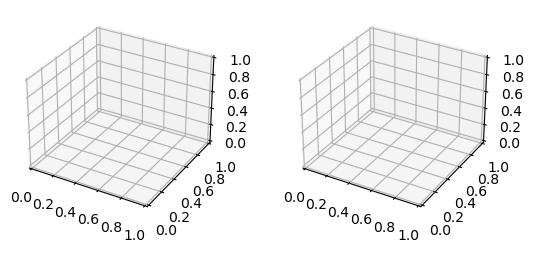

In [254]:
plt.figure(figsize=(10, 6))

index_order = (0,1,2)


#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
# ax3 = plt.subplot(233, projection='3d')  # First row, second column
# ax4 = plt.subplot(234, projection='3d')  # First row, second column
# ax5 = plt.subplot(235, projection='3d')  # First row, second column
# ax6 = plt.subplot(236, projection='3d')  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_order,embedding=first_embeddings, embedding_labels='time', title='rnn output')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order,embedding=train_target_tensor.detach().numpy(), embedding_labels='time', title='Target embedding Input')
# ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_order,embedding=target, embedding_labels='time', title='M1 rnn target')
# ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order,embedding=rnn_output_embedding, embedding_labels=discete_lables[:,0], title='rnn output')
# ax5 = cebra.plot_embedding(ax=ax5,idx_order=index_order,embedding=input, embedding_labels=discete_lables[:,0], title='Mthal rnn input')
# ax6 = cebra.plot_embedding(ax=ax6,idx_order=index_order,embedding=target, embedding_labels=discete_lables[:,0], title='M1 rnn target')

# add title
plt.suptitle('M1 Vs. Rnn embeddings')

### 4. Test rnn on unseen data

In [263]:
test_input_tensor.shape, test_target_tensor.shape

(torch.Size([5733, 32]), torch.Size([5733, 32]))

create dataloader for unseen test data (data witheld from both training and validation)

In [264]:
class FullSequenceDataset(Dataset):
    def __init__(self, features, labels):
        # Ensure data is in the correct shape [1, seq_length, feature_size]
        self.features = torch.tensor(features, dtype=torch.float32).unsqueeze(0)  # Add batch dimension
        self.labels = torch.tensor(labels, dtype=torch.float32).unsqueeze(0)      # Add batch dimension

    def __len__(self):
        return 1  # We have only one batch in this dataset

    def __getitem__(self, index):
        # Return the whole sequence
        return self.features[index], self.labels[index]

test_dataset = FullSequenceDataset(test_input_tensor, test_target_tensor)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)  # No need to shuffle, only one batch



C:\Users\user\AppData\Local\Temp\ipykernel_16264\1057171156.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.features = torch.tensor(features, dtype=torch.float32).unsqueeze(0)  # Add batch dimension
C:\Users\user\AppData\Local\Temp\ipykernel_16264\1057171156.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.labels = torch.tensor(labels, dtype=torch.float32).unsqueeze(0)      # Add batch dimension


In [265]:
test_input_tensor.shape, test_target_tensor.shape

(torch.Size([5733, 32]), torch.Size([5733, 32]))

In [266]:
for inputs, targets in test_loader:
    print("Inputs shape:", inputs.shape)  # Expected: torch.Size([1, 9174, 32])
    print("Targets shape:", targets.shape)  # Expected: torch.Size([1, 9174, 20])

    # Additionally, check individual timestep data if needed:
    print("Single input timestep shape:", inputs[0][1].shape)  # Should print the shape of the feature vector: torch.Size([32])
    print("Single input timestep data:", inputs[0][1])  # Data of the features at timestep 2
    print("Single target timestep shape:", targets[0][1].shape)  # Should print the shape of the target vector: torch.Size([20])
    print("Single target timestep data:", targets[0][1])  # Data of the targets at timestep 2
    break  # Since all data is in one batch, no need to loop further


Inputs shape: torch.Size([1, 5733, 32])
Targets shape: torch.Size([1, 5733, 32])
Single input timestep shape: torch.Size([32])
Single input timestep data: tensor([ 0.6239, -1.0448,  0.7790, -1.3043,  0.0374, -1.2290, -1.3942, -0.7983,
        -0.3854,  0.9013, -0.1103, -1.5950,  0.1538, -1.9420, -1.5714,  0.4921,
        -1.6359,  0.4191, -1.2474,  0.1140,  0.6245,  1.3126,  1.1174, -1.7966,
        -1.5014, -1.7059,  2.1049,  0.0386, -1.4471,  1.9258, -1.0751,  0.3011])
Single target timestep shape: torch.Size([32])
Single target timestep data: tensor([ 1.0422, -1.2224, -1.2290,  1.1085, -0.9418,  0.9547, -1.1264,  0.5615,
        -1.2793, -1.1202,  0.8752,  0.8285,  0.2977,  0.8715, -0.6616,  1.2321,
        -0.3369,  0.2334, -0.7038,  0.5411, -0.9417, -1.3062, -0.4134, -1.0825,
         1.0507, -0.7569,  0.5543,  0.2220,  1.3779, -0.7478,  1.1159, -0.3612])


Run a single pass of the already trained rnn on this unseen data
- makes prediction on unseen data (does not update the rnn in anyway)

In [305]:
neural_rnn.eval()  # Set the model to evaluation mode
test_predictions = []

with torch.no_grad():  # No gradients needed for evaluation, which saves memory and computations
    for inputs, targets in test_loader:
        print(inputs.shape)
        print(targets.shape)
        outputs = neural_rnn(inputs)  # Generate predictions
        print(outputs.shape)
        # Initialize the MSE loss function
        mse_loss = nn.MSELoss()
        # Calculate the MSE
        loss = mse_loss(outputs, targets)
        # Print the MSE loss
        print("Overall Mean Squared Error Loss:", loss.item())
        # Assuming the last dimension of your tensors is the embedding dimension (32 embeddings)
        num_embeddings = outputs.shape[-1]

        # Loop through each embedding dimension and calculate MSE
        mse_per_embedding = []
        for i in range(num_embeddings):
            # Select the data for the current embedding across all time bins
            output_emb = outputs[:, :, i]
            target_emb = targets[:, :, i]

            # Calculate the MSE for the current embedding
            loss = mse_loss(output_emb, target_emb)
            mse_per_embedding.append(loss.item())

            # Optionally, print the MSE for each embedding
            print(f"MSE for embedding {i}: {loss.item()}")

        # If needed, convert the list to a tensor for further analysis or operations
        mse_per_embedding_tensor = torch.tensor(mse_per_embedding)
        
outputs

torch.Size([1, 5733, 32])
torch.Size([1, 5733, 32])
torch.Size([1, 5733, 32])
Overall Mean Squared Error Loss: 0.7338436245918274
MSE for embedding 0: 0.39805781841278076
MSE for embedding 1: 0.27339786291122437
MSE for embedding 2: 0.3805834949016571
MSE for embedding 3: 0.7222733497619629
MSE for embedding 4: 0.9430304765701294
MSE for embedding 5: 0.4987642765045166
MSE for embedding 6: 1.0792899131774902
MSE for embedding 7: 0.42503225803375244
MSE for embedding 8: 0.3872837722301483
MSE for embedding 9: 0.9228034615516663
MSE for embedding 10: 0.9817362427711487
MSE for embedding 11: 1.0032520294189453
MSE for embedding 12: 0.7330219149589539
MSE for embedding 13: 0.9478587508201599
MSE for embedding 14: 0.5702196955680847
MSE for embedding 15: 1.0942200422286987
MSE for embedding 16: 0.3919563889503479
MSE for embedding 17: 0.5786257386207581
MSE for embedding 18: 0.7342117428779602
MSE for embedding 19: 0.209365576505661
MSE for embedding 20: 1.0651875734329224
MSE for embedding

tensor([[[ 0.8005,  0.2782,  0.2477,  ...,  0.2191, -0.1429, -0.0667],
         [ 1.0009,  0.0020,  0.0284,  ...,  0.5336, -0.1613, -0.2160],
         [ 1.1053, -0.3187, -0.1738,  ...,  0.6813, -0.3185, -0.5697],
         ...,
         [ 0.4192, -0.4664, -0.6109,  ...,  0.7355, -0.4920, -0.7770],
         [ 0.5196, -0.4305, -0.5085,  ...,  0.7225, -0.5029, -0.7617],
         [ 0.7523, -0.3489, -0.5858,  ...,  0.8865, -0.5156, -0.6138]]])

In [306]:
outputs= outputs.detach().numpy()
rnn_predictions = outputs
rnn_predictions.shape

(1, 5733, 32)

In [307]:
test_y.shape

(5733, 32)

In [308]:
rnn_predictions_embedding_3d  = rnn_predictions[0, :, :]
test_target_embedding_3d  = test_y[:, :]
rnn_predictions.shape, test_target_embedding_3d.shape

((1, 5733, 32), (5733, 32))

In [309]:
rnn_predictions.shape, label_test.shape, label_train.shape

((1, 5733, 32), (7518,), (30072,))

In [310]:
train_input_tensor.shape, train_target_tensor.shape, valid_input_tensor.shape, valid_target_tensor.shape, test_input_tensor.shape, test_target_tensor.shape

(torch.Size([26754, 32]),
 (26670, 32),
 torch.Size([5733, 32]),
 torch.Size([5733, 32]),
 torch.Size([5733, 32]),
 torch.Size([5733, 32]))

In [311]:
label_test_split = discete_lables[-5733:]
label_test_split.shape

(5733, 2)

In [312]:
np.unique(discete_lables[:,0]), np.unique(discete_lables[:,1])

(array([0., 1., 2.]), array([0., 1.]))

ValueError: num must be an integer with 1 <= num <= 4, not 5

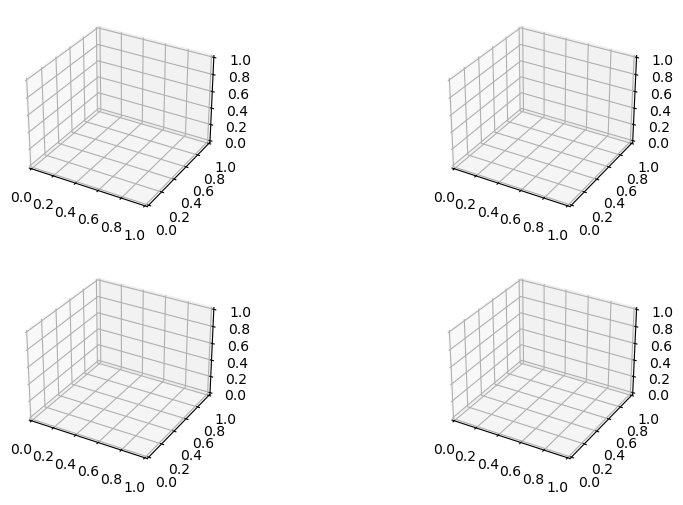

In [313]:
plt.figure(figsize=(10, 6))

index_orde_rnn = (3,4,5)
index_order_test_y = (1,2,3)


#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(221, projection='3d')  # First row, first column
ax2 = plt.subplot(222, projection='3d')  # First row, second column
ax3 = plt.subplot(223, projection='3d')  # First row, second column
ax4 = plt.subplot(224, projection='3d')  # First row, second column
ax5 = plt.subplot(225, projection='3d')  # First row, second column
ax6 = plt.subplot(226, projection='3d')  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_orde_rnn,embedding=rnn_predictions_embedding_3d, embedding_labels=label_test_split[:,0], title='rnn output ID')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order_test_y,embedding=test_target_embedding_3d, embedding_labels=label_test_split[:,0], title='Target embedding Input ID')

ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_orde_rnn,embedding=rnn_predictions_embedding_3d, embedding_labels=label_test_split[:,1], title='rnn output SF')
ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order_test_y,embedding=test_target_embedding_3d, embedding_labels=label_test_split[:,1], title='Target embedding SF')
ax5 = cebra.plot_embedding(ax=ax5,idx_order=0,embedding=output_predictions_flat, embedding_labels=train_lables_discrete[:,1], title='rnn output SF')
ax6 = cebra.plot_embedding(ax=ax6,idx_order=0,embedding=train_target_tensor, embedding_labels=train_lables_discrete[:,1], title='Target embedding SF')
# add title
plt.suptitle('M1 Vs. Rnn embeddings')

In [301]:
test_y[:,0].shape, rnn_predictions.shape

((5733,), (1, 5733, 32))

In [302]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit

def view_rnn_predictions(unit_to_view,second_unit_to_view,third_unit_to_view,reaches_to_view):

    # Close any previous plots
    plt.close('all')

    # Create a new figure with a specific size
    fig = plt.figure(figsize=(15, 14))

    # First row
    ax1 = fig.add_subplot(431)  # First row, first column
    ax2 = fig.add_subplot(432)  # First row, second column
    ax3 = fig.add_subplot(433)  # First row, third column

    # Second row
    ax4 = fig.add_subplot(434)  # Second row, first column
    ax5 = fig.add_subplot(435)  # Second row, second column
    ax6 = fig.add_subplot(436)  # Second row, third column

    # Third row
    ax7 = fig.add_subplot(437)  # Third row, first column
    ax8 = fig.add_subplot(438)  # Third row, second column
    ax9 = fig.add_subplot(439)  # Third row, third column

    # Fourth row
    ax10 = fig.add_subplot(4, 3, 10,projection='3d')  # Fourth row, first column
    ax11 = fig.add_subplot(4, 3, 11,projection='3d')  # Fourth row, second column
    ax12 = fig.add_subplot(4, 3, 12, projection='3d')  # Fourth row, third column

 
    # Assuming data_mthal_neuralData_T and data_mthal_embedding_T are correctly set up
    for reach in reaches_to_view:
        # Calculate the start and end indices for each reach
        reach_start = reach * 210
        reach_end = reach_start + 210

        # Fetch data for the specified reach
        unit_frs = data_mthal_neuralData[unit_to_view].to_numpy()[reach_start:reach_end]
        second_unit_frs = data_mthal_neuralData[second_unit_to_view].to_numpy()[reach_start:reach_end]
        third_unit_frs = data_mthal_neuralData[third_unit_to_view].to_numpy()[reach_start:reach_end]

        embedding_1_rnn =  rnn_predictions[0, :, 0][reach_start:reach_end]
        embedding_2_rnn =  rnn_predictions[0, :, 1][reach_start:reach_end]
        embedding_3_rnn =  rnn_predictions[0, :, 2][reach_start:reach_end]

        # embedding_1_m1 = test_targets[0, :, 0].detach().numpy()[reach_start:reach_end]
        # embedding_2_m1 = test_targets[0, :, 1].detach().numpy()[reach_start:reach_end]
        # embedding_3_m1 = test_targets[0, :, 2].detach().numpy()[reach_start:reach_end]

        
        embedding_1_m1 = test_y[:,0][reach_start:reach_end]
        embedding_2_m1 = test_y[:,1][reach_start:reach_end]
        embedding_3_m1 = test_y[:,2][reach_start:reach_end]

        # Plotting data for the specified reach, first unit
        ax1.plot(unit_frs, label=f'Reach {reach}')
        ax2.plot(second_unit_frs, label=f'Reach {reach}')
        ax3.plot(third_unit_frs, label=f'Reach {reach}')

        # Plotting data for the specified reach, second unit
        ax4.plot(embedding_1_rnn, label=f'Reach {reach}')
        ax5.plot(embedding_2_rnn, label=f'Reach {reach}')
        ax6.plot(embedding_3_rnn,  label=f'Reach {reach}')

        
        # Plotting data for the specified reach, second unit
        ax7.plot(embedding_1_m1, label=f'Reach {reach}')
        ax8.plot(embedding_2_m1, label=f'Reach {reach}')
        ax9.plot(embedding_3_m1,  label=f'Reach {reach}')

        ax10.plot(embedding_1_rnn, embedding_2_rnn, embedding_3_rnn, label=f'Reach {reach}')
        ax11.plot(embedding_1_m1, embedding_2_m1, embedding_3_m1, label=f'Reach {reach}')



    # Adding legends to each subplot
    # for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    #     ax.legend()
    # Setting titles for subplots, first unit
    ax1.set_title(f"Mtahl Unit {unit_to_view} Firing Rate")
    ax2.set_title(f"Mtahl Unit {second_unit_to_view} Firing Rate")
    ax3.set_title(f"Mtahl Unit {third_unit_to_view} Firing Rate")

    # Setting titles for subplots, second unit
    ax4.set_title("Rnn Prediction 1st Embedding")
    ax5.set_title("Rnn Prediction 2nd Embedding")
    ax6.set_title("Rnn Prediction 3rd Embedding")

    ax7.set_title("M1 1st Embedding")
    ax8.set_title("M1 2nd Embedding")
    ax9.set_title("M1 3rd Embedding")

    ax10.set_title("Rnn 3D Embedding")
    ax11.set_title("M1 3D Embedding")


    # Overall title for the figure
    fig.suptitle(f'Checking top 3 embeddings for M1 and Mthal at spefici reachs')

    # Show the plot
    plt.show()

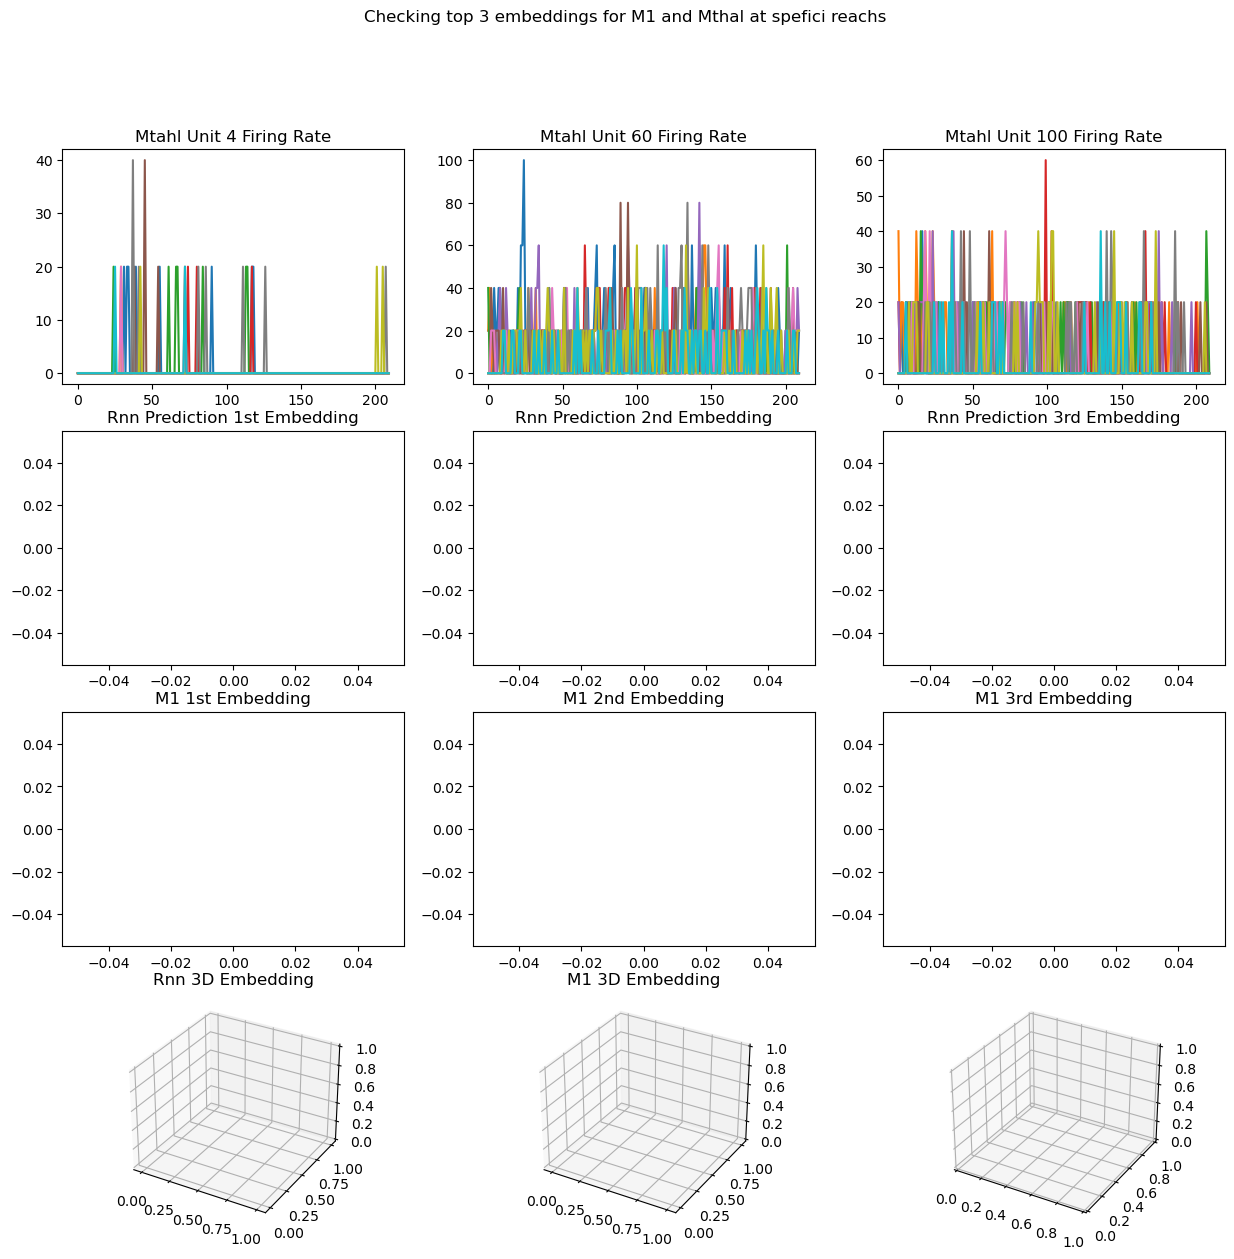

In [303]:
# Units to view
unit_to_view = 4
second_unit_to_view = 60  # Second unit to display
third_unit_to_view = 100
reaches_to_view = range(30, 40)  # Range of reaches to display

view_rnn_predictions(unit_to_view,second_unit_to_view,third_unit_to_view,reaches_to_view)

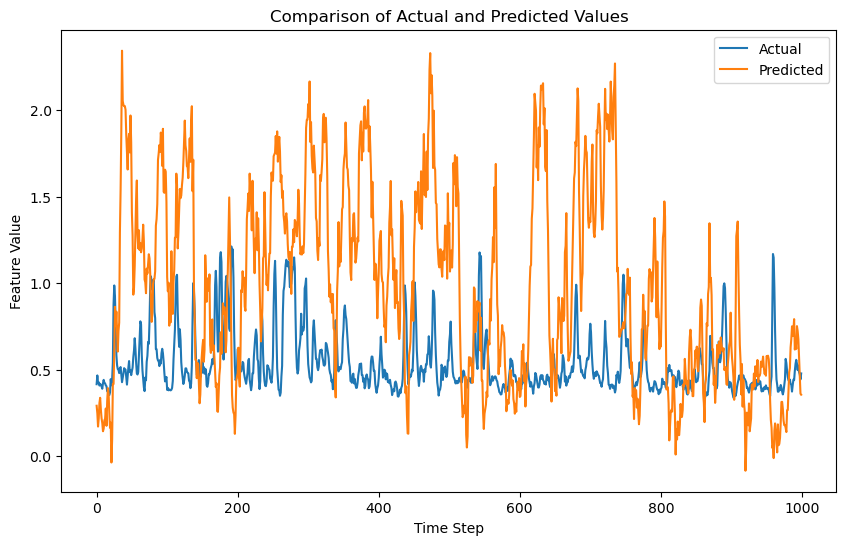

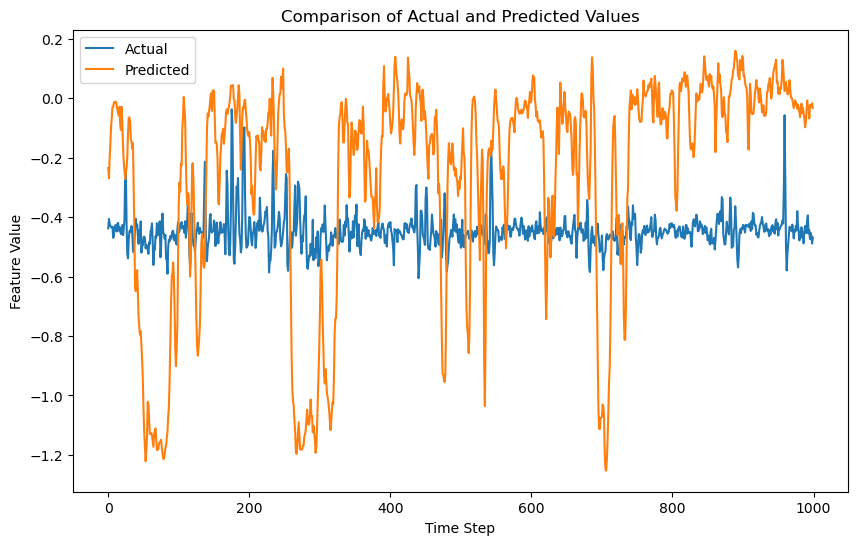

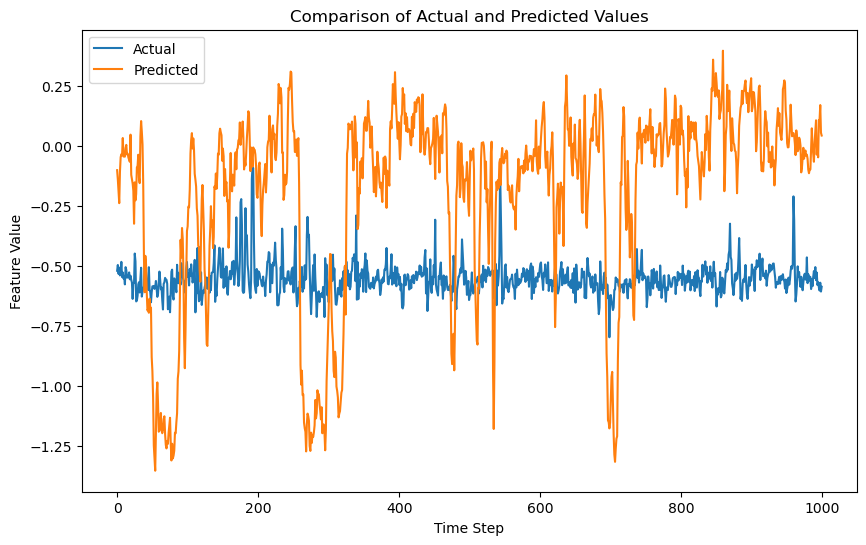

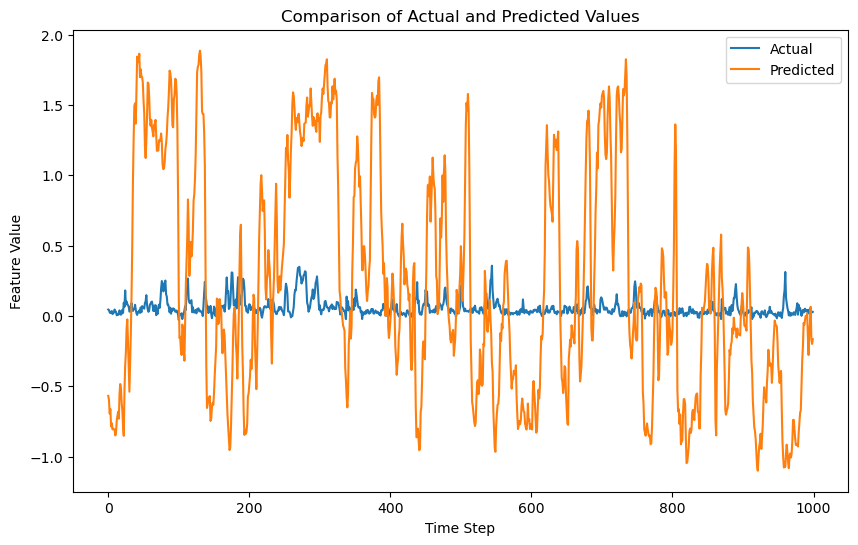

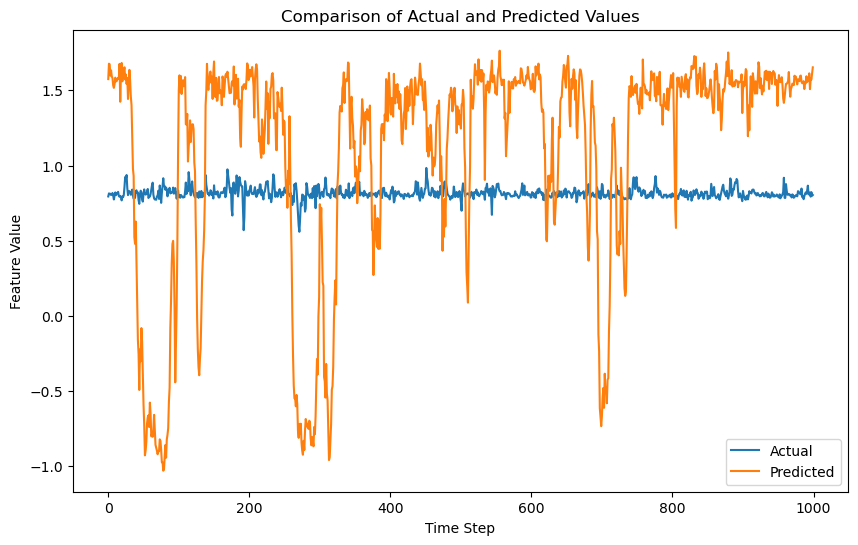

In [304]:
import matplotlib.pyplot as plt

# Example: Plot the first sequence of predictions vs. actuals for the first feature
plt.figure(figsize=(10, 6))
plt.plot(rnn_predictions[0, :, 0][1500:2500], label='Actual')
plt.plot(test_y[:,0][1500:2500], label='Predicted', linestyle='-')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

# Example: Plot the first sequence of predictions vs. actuals for the first feature
plt.figure(figsize=(10, 6))
plt.plot(rnn_predictions[0, :, 1][1500:2500], label='Actual')
plt.plot(test_y[:,1][1500:2500], label='Predicted', linestyle='-')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

# Example: Plot the first sequence of predictions vs. actuals for the first feature
plt.figure(figsize=(10, 6))
plt.plot(rnn_predictions[0, :, 2][1500:2500], label='Actual')
plt.plot(test_y[:,2][1500:2500], label='Predicted', linestyle='-')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

# Example: Plot the first sequence of predictions vs. actuals for the first feature
plt.figure(figsize=(10, 6))
plt.plot(rnn_predictions[0, :, 3][1500:2500], label='Actual')
plt.plot(test_y[:,3][1500:2500], label='Predicted', linestyle='-')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

# Example: Plot the first sequence of predictions vs. actuals for the first feature
plt.figure(figsize=(10, 6))
plt.plot(rnn_predictions[0, :, 4][1500:2500], label='Actual')
plt.plot(test_y[:,4][1500:2500], label='Predicted', linestyle='-')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.legend()
plt.show()




### 6. Load in a perviously trained RNN and test its preditons

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import copy

In [4]:
class NeuralRNN(nn.Module):
    def __init__(self, input_size=32, hidden_size=64, num_layers=1, output_size=32, dropout=0.5):
        super(NeuralRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # Define the LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, 
                            dropout=dropout if num_layers > 1 else 0)
        
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, return_states=False):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        # Initialize cell state with zeros
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate the LSTM
        out, (hn, cn) = self.lstm(x, (h0, c0))
        
        if return_states:
            return self.fc(out), hn, cn
        else:
            return self.fc(out)


In [5]:
rnn_path = r"rnn_models\rnn_model_43_reach1_4_2024-05-08_14-49-41.pth"
# Parameters must match those of the model you're loading
input_size = 32
hidden_size = 64
num_layers = 2  # This needs to match the saved model
output_size = 32  # This needs to match the saved model
dropout = 0.1

num_epochs = 100  # Update this based on your actual training epochs before early stopping

# Use the same parameters as the original model
neural_rnn_loaded = NeuralRNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size, dropout=dropout).to(device)

# Loading the model
# Loading the model with the same architecture
neural_rnn_loaded = NeuralRNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size, dropout=dropout).to(device)
neural_rnn_loaded.load_state_dict(torch.load(rnn_path))
neural_rnn_loaded.eval()  # Set it to evaluation mode if only doing inference

# If you want to continue training, switch back to train mode
neural_rnn_loaded.train()

NameError: name 'device' is not defined

### 5. Decode lables from embeddings
- Decode lables (trial_ID, Success or Failure) from cebra embeddings
- Decode lables (trial_ID, Success or Failure) from RNN predicted embeddings

### 6. Pass real M1 embeddings cerebellar SNN
- See if SNN can predict when their is an error